<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Autocorrelations and time series decomposition



---

## Learning Objectives

### Core

- Calculate and plot autocorrelation and partial autocorrelation coefficients
- Read and interpret the autocorrelation plots
- Obtain a time series decomposition into trend, seasonal and residual components
- Know about stationarity as an important model requirement
- Use differencing to remove (polynomial) trends

### Target

- Know about differences between pandas and statsmodels auotcorrelation functions

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Load-the-Unemployment-Data" data-toc-modified-id="Load-the-Unemployment-Data-2">Load the Unemployment Data</a></span></li><li><span><a href="#Create-a-Datetime-Index" data-toc-modified-id="Create-a-Datetime-Index-3">Create a Datetime Index</a></span></li><li><span><a href="#Visually-Examine-the-Unemployment-Rate" data-toc-modified-id="Visually-Examine-the-Unemployment-Rate-4">Visually Examine the Unemployment Rate</a></span></li><li><span><a href="#Autocorrelation-and-the-Autocorrelation-Function-(ACF)" data-toc-modified-id="Autocorrelation-and-the-Autocorrelation-Function-(ACF)-5">Autocorrelation and the Autocorrelation Function (ACF)</a></span><ul class="toc-item"><li><span><a href="#Computing-Autocorrelation" data-toc-modified-id="Computing-Autocorrelation-5.1">Computing Autocorrelation</a></span></li><li><span><a href="#Autocorrelation-Using-Statsmodels" data-toc-modified-id="Autocorrelation-Using-Statsmodels-5.2">Autocorrelation Using Statsmodels</a></span></li></ul></li><li><span><a href="#Partial-Autocorrelation-and-the-Partial-Autocorrelation-Function-(PACF)" data-toc-modified-id="Partial-Autocorrelation-and-the-Partial-Autocorrelation-Function-(PACF)-6">Partial Autocorrelation and the Partial Autocorrelation Function (PACF)</a></span></li><li><span><a href="#Time-Series-Decomposition" data-toc-modified-id="Time-Series-Decomposition-7">Time Series Decomposition</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Questions:" data-toc-modified-id="Questions:-7.0.1">Questions:</a></span></li></ul></li></ul></li><li><span><a href="#Differencing-a-time-series-and-stationarity" data-toc-modified-id="Differencing-a-time-series-and-stationarity-8">Differencing a time series and stationarity</a></span><ul class="toc-item"><li><span><a href="#Difference-the-unemployment-rate-and-plot" data-toc-modified-id="Difference-the-unemployment-rate-and-plot-8.1">Difference the unemployment rate and plot</a></span></li><li><span><a href="#Compare-the-(partial)-autocorrelations-of-the-differenced-and-original-time-series" data-toc-modified-id="Compare-the-(partial)-autocorrelations-of-the-differenced-and-original-time-series-8.2">Compare the (partial) autocorrelations of the differenced and original time series</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8.3">Conclusions</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the Unemployment Data

This is the historical monthly data regarding unemployment rates in the United States that we have cleaned in the previous unit. Let's read it in.

In [3]:
data = pd.read_csv('../datasets/unemployment_cleaned.csv', index_col='date')
data.dropna(inplace=True)

In [4]:
data.head()

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2


## Visually Examine the Unemployment Rate

Plot the unemployment rate.

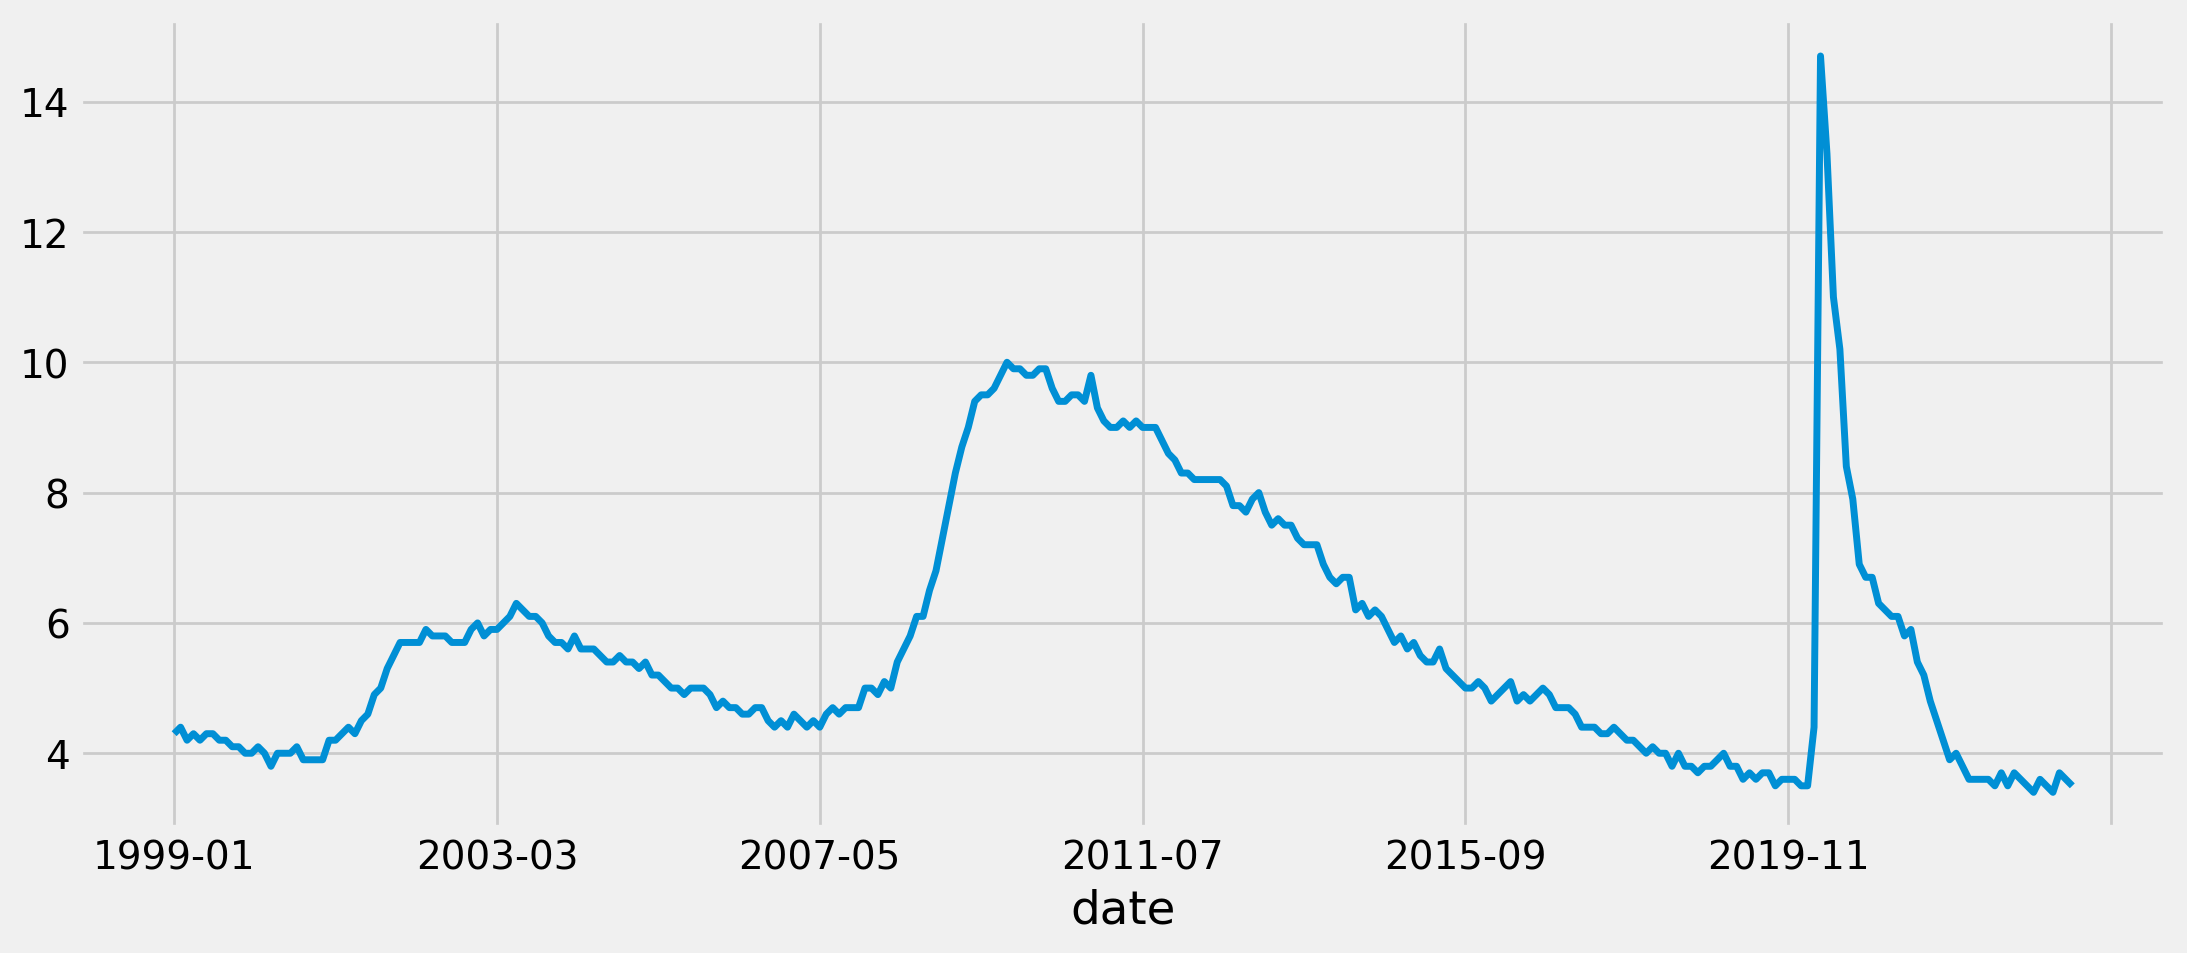

In [5]:
data['unemployment_rate'].plot(lw=2.5, figsize=(12,5));

In [6]:
# To perform time series analysis, the date must be the index and stored in datetime format.
data.index=pd.to_datetime(data.index)

In [7]:
# Check the info()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295 entries, 1999-01-01 to 2023-07-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unemployment_rate  295 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


##  Autocorrelation and the Autocorrelation Function (ACF)

Previously, our analyses have been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely **earlier** values relate to values that occur **later** in time.

Examples of autocorrelation are:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less of an extent.

Below is the formula for the autocorrelation function (ACF):

Given measurements $x_1, x_2, x_3, \ldots, x_n$ at time points $t_1, t_2, t_3, \ldots, t_n$:

$${\rm acf}({\rm lag_k}) = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

Given measurements $x_1, x_2, x_3, \ldots, x_n$ and measurements $y_1, y_2, y_3, \ldots, y_n$:

$$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$


In this sum, the **lag** $k$ indicates to sum over all pairs of points which are that lag apart.

### Autocorrelation Using Statsmodels

Statsmodels comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out:

```python
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
```

In [8]:
from statsmodels.tsa.stattools import acf

To calculate the autocorrelations, we pass the unemployment rate series to the `acf` function. 

In [9]:
urate = data['unemployment_rate']

In [10]:
urate

date
1999-01-01    4.3
1999-02-01    4.4
1999-03-01    4.2
1999-04-01    4.3
1999-05-01    4.2
             ... 
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
Name: unemployment_rate, Length: 295, dtype: float64

In [11]:
acf(urate,nlags=20)

array([1.        , 0.94032595, 0.87803785, 0.82810015, 0.78116869,
       0.74637693, 0.71301768, 0.68542773, 0.65943323, 0.63154344,
       0.60360017, 0.5755168 , 0.54471813, 0.51409131, 0.48372046,
       0.45082399, 0.41922244, 0.38571097, 0.35510267, 0.32516035,
       0.29842676])

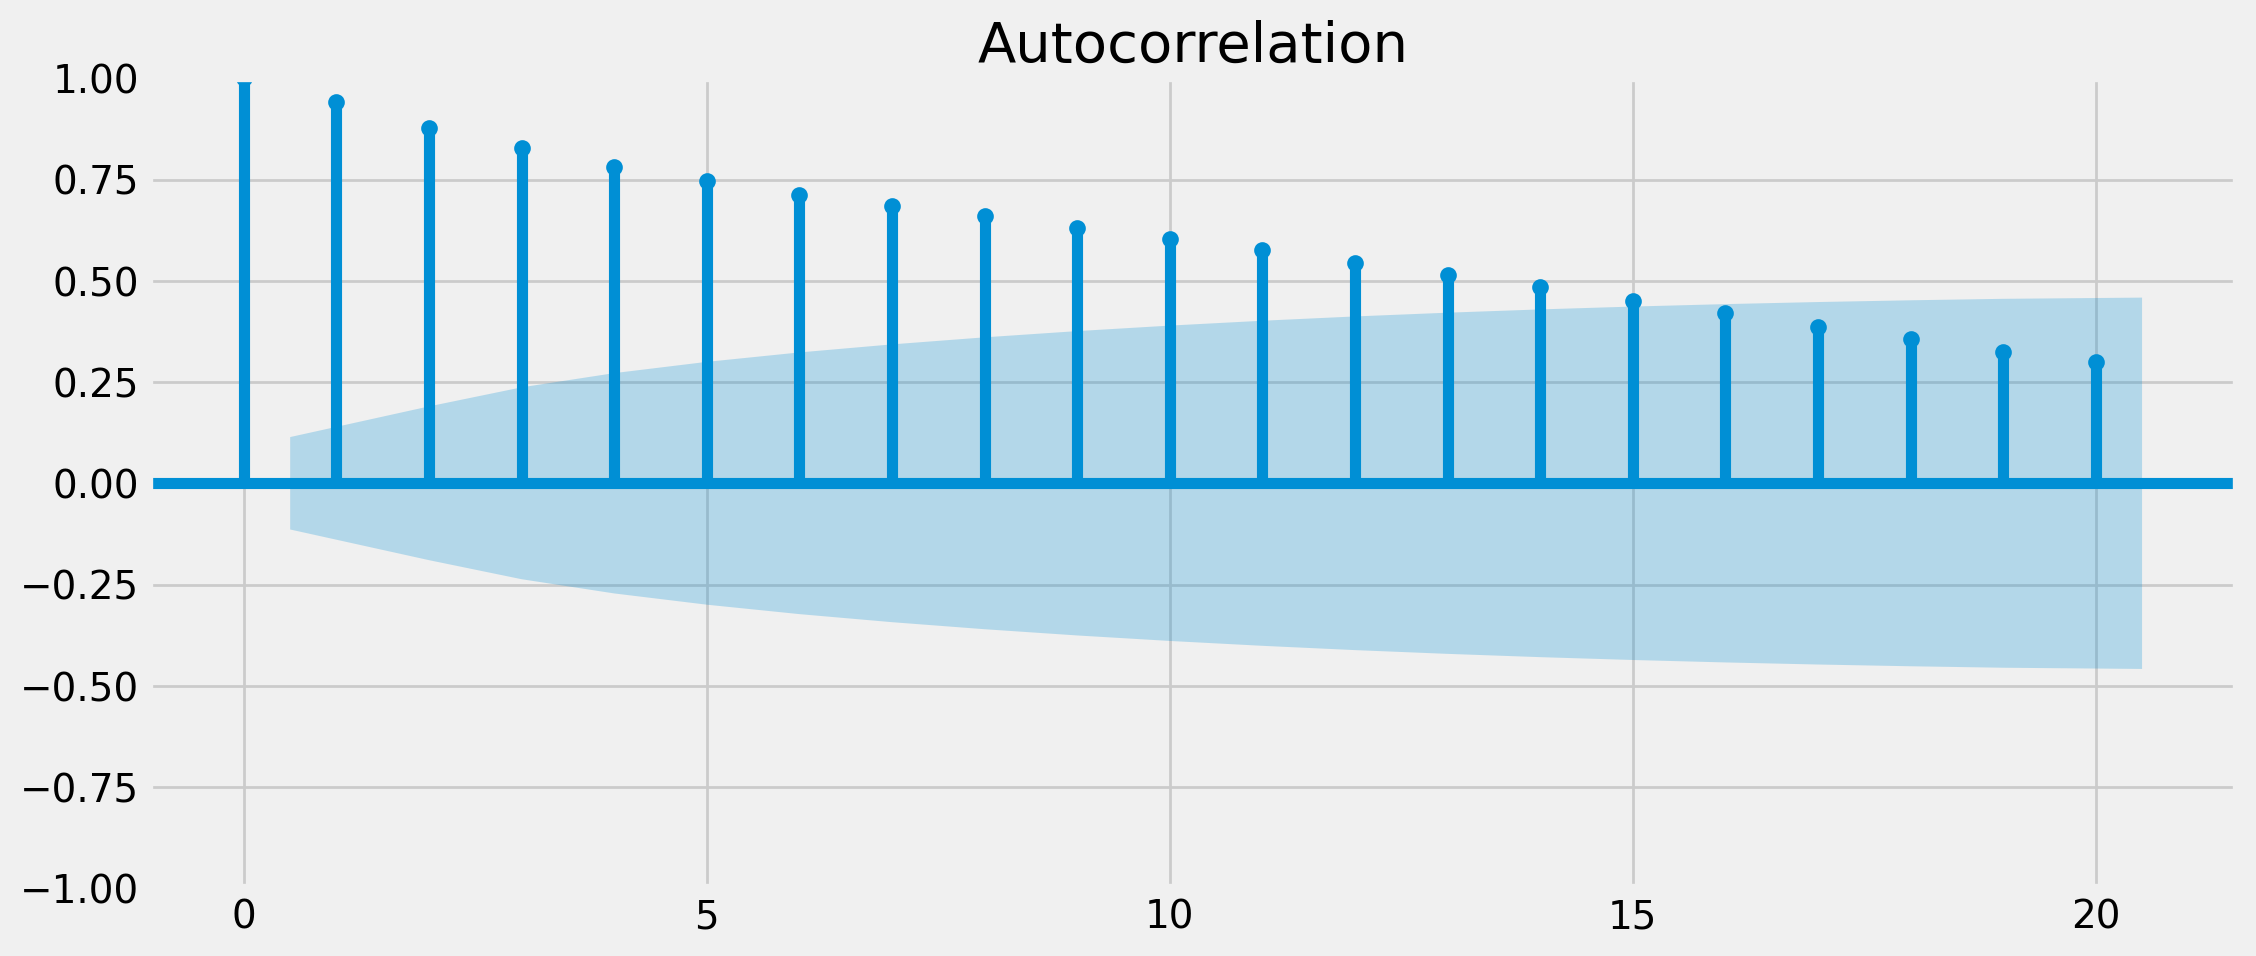

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,5))
plot_acf(urate, lags=20, ax=ax)
plt.show()

The autocorrelation plot is used to quickly identify the lag values which have highest correlation. 

The filled blue space shows the 95% confidence interval for the correlation values.  The points inside the blue space are likely to be noise and do not imply any valuable correlation.  With the default 95% confidence interval we can expect that 5% of observations could fall outside this boundary, and those that do are the ones we should consider for further investigation about correlation.

Based on the autocorrelation plot for the unemployement rate:

Lag 0: The point at lag 0 has high correlation (1!) Why??
Lag 1: High correlation between consecutive months. (January unemployment has correlation with February, etc)
Lag 2: High correlation for 2 month lag: (January has correlation with March)
etc



## Partial Autocorrelation and the Partial Autocorrelation Function (PACF)


Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of lags in between._

Load up the sister functions for partial autocorrelation from Statsmodels and test them out on the differenced time series.

```python
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
```

In [13]:
from statsmodels.tsa.stattools import pacf

In [14]:
pacf(urate,nlags=20)

array([ 1.00000000e+00,  9.43524341e-01, -5.65488129e-02,  7.94302728e-02,
       -7.38164097e-03,  9.55926231e-02, -1.07823474e-02,  5.85152980e-02,
       -4.02943945e-04, -8.05887741e-03, -1.04908533e-02, -6.09770556e-03,
       -4.04571507e-02, -1.38114068e-02, -2.26258873e-02, -4.67502710e-02,
       -1.57665709e-02, -4.97056636e-02,  1.81151883e-03, -3.26072108e-02,
        1.39684181e-02])

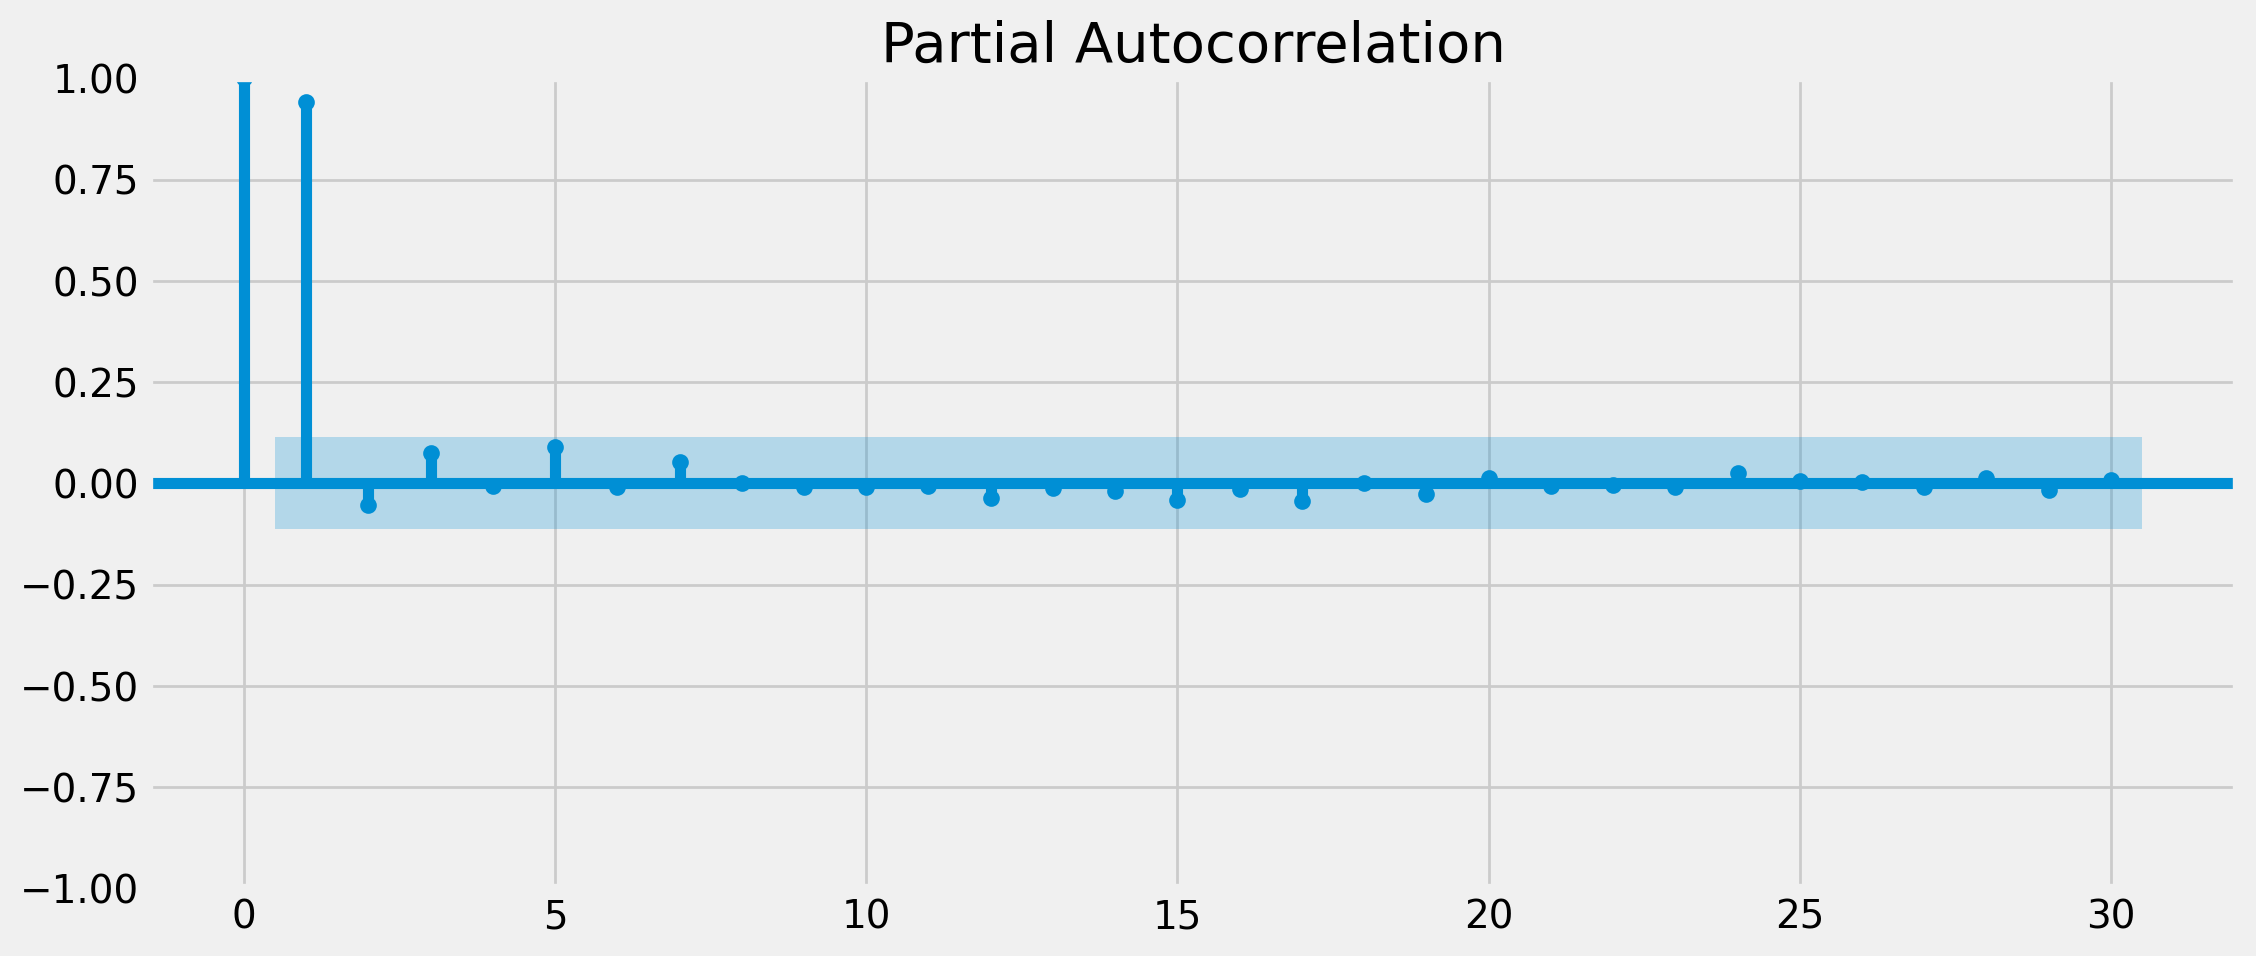

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(urate, lags=30, ax=ax)
plt.show()

The partial autocorrelation shows significant correlation for lag 1, which means the month immediately preceding the current month. We can see now that the other lags are not significant, which helps us to determine that only lag 1 needs to be considered for the model.


The time series models we are going to consider try to capture the information contained in the (partial) autocorrelations.

Let's create a function to display autocorrelations and partial autocorrelations together.

In [16]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

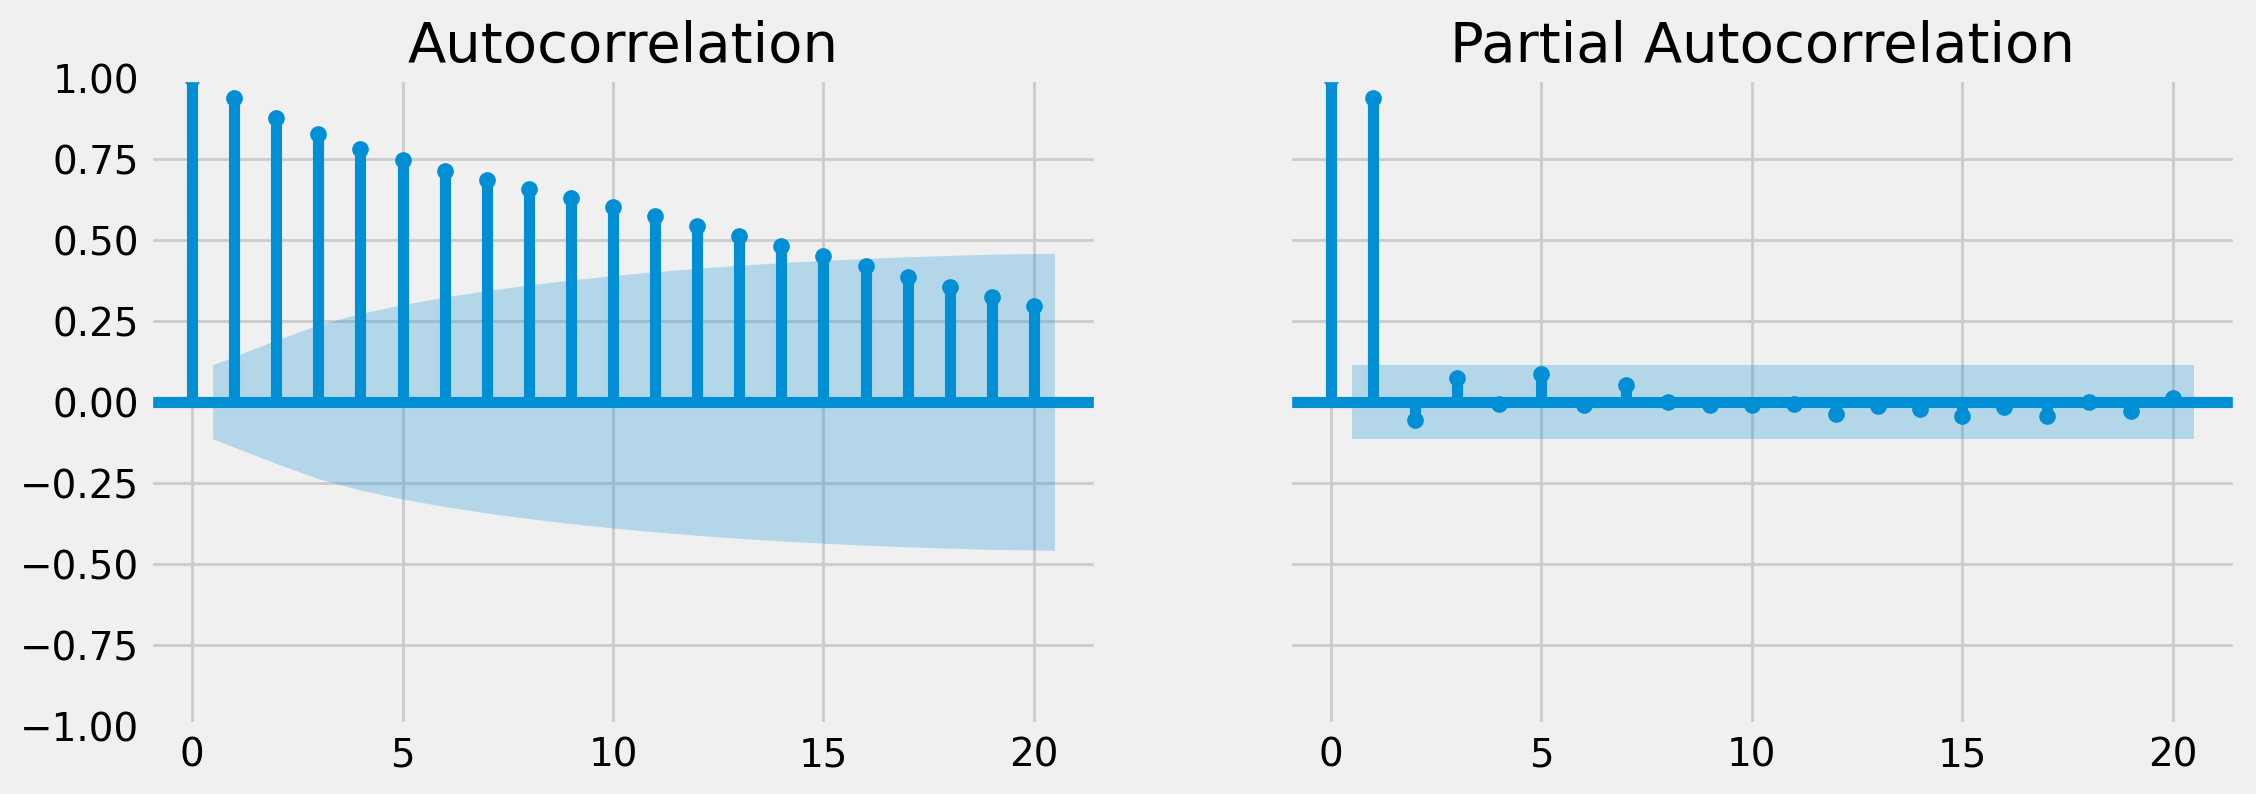

In [17]:
fig, ax = autocorr_plots(urate,lags=20)

## Time Series Decomposition

$$ Y_t = T_t + S_t + R_t $$

- $Y_t = $ observed value at time $t$
- $T_t = $ trend component, *long-term behavior*
- $S_t = $ seasonality component, *periodic fluctuations*
- $R_t = $ residual, *non-periodic fluctuations*


> The decomposition above is additive; it can also be multiplicative.


There are several algorithms for performing this decomposition

- Classical decomp., [https://www.otexts.org/fpp/6/3](https://www.otexts.org/fpp/6/3)
- X-12-ARIMA, [https://www.otexts.org/fpp/6/4](https://www.otexts.org/fpp/6/4)
- STL, [https://www.otexts.org/fpp/6/5](https://www.otexts.org/fpp/6/5)

See also `seasonal_decompose` in `statsmodel.tsa.seasonal`.  

> Nice tutorial here: [http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/](http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


#### Questions:

- *What is the long-term behavior of my series?*
- *How does my time series fluctuate?*


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

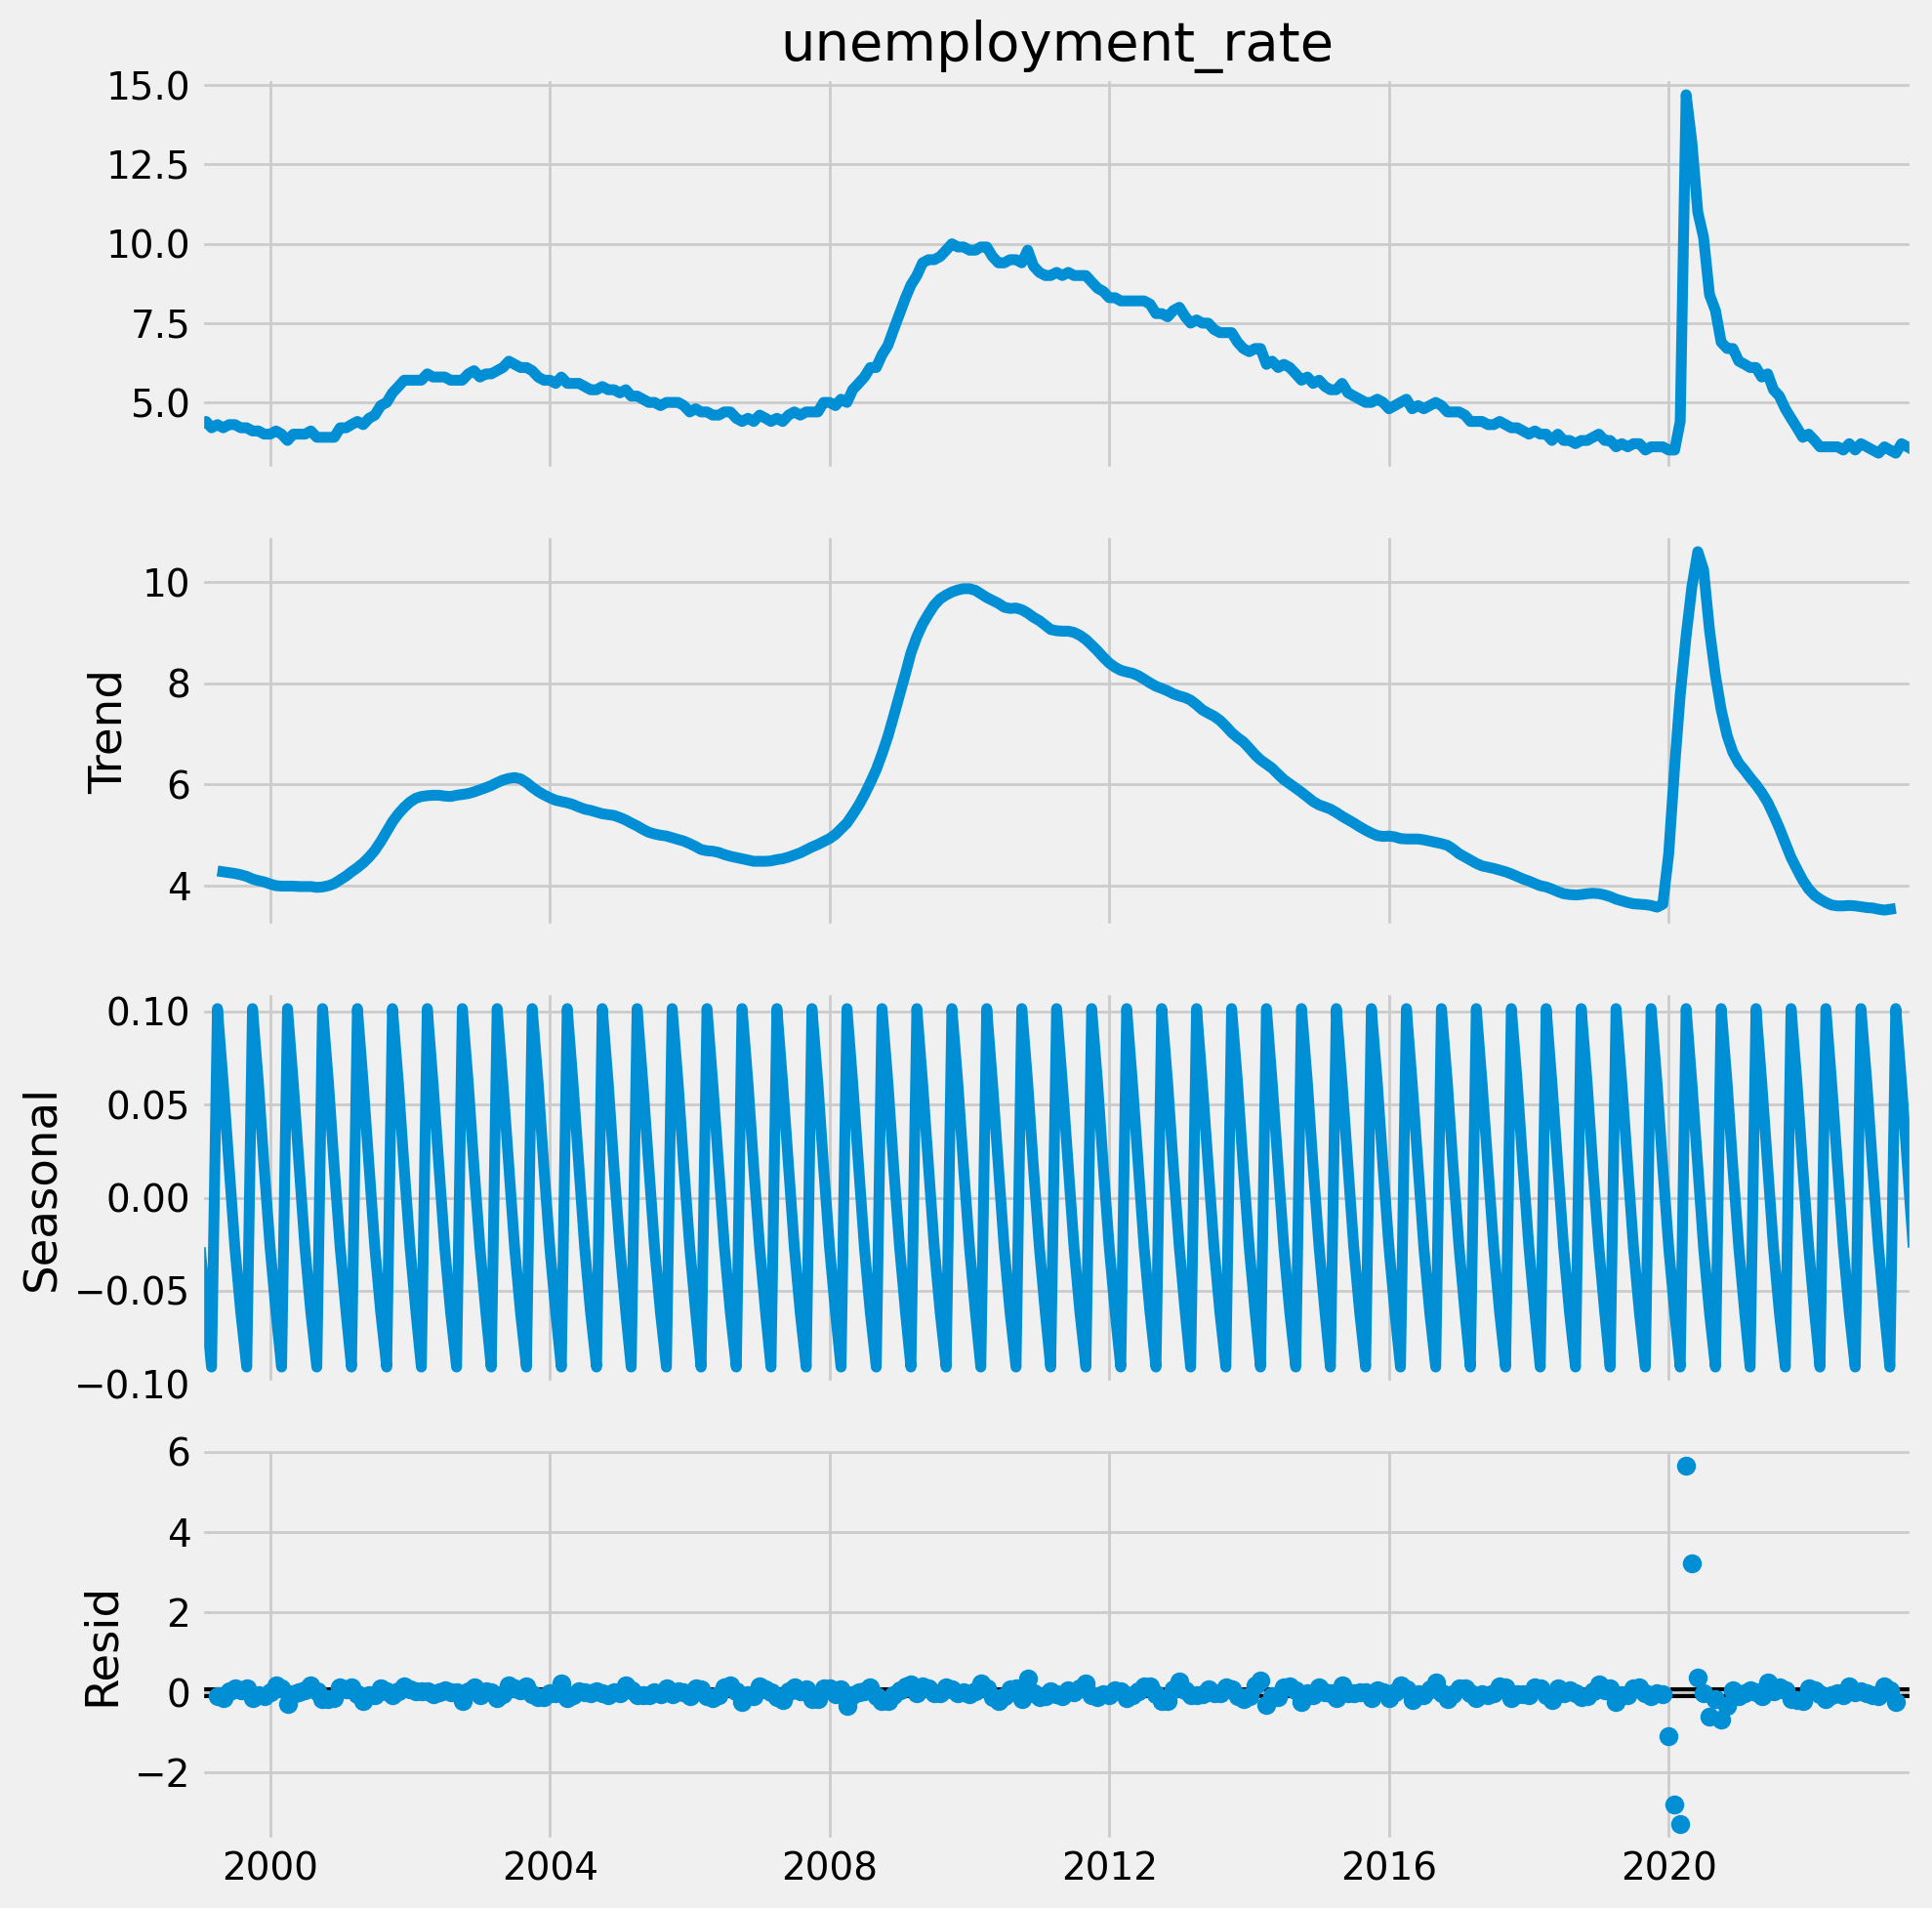

In [25]:
result = seasonal_decompose(urate, period=6)
fig = result.plot()
fig.set_size_inches(10,10)
plt.tight_layout()
plt.show()

The `seasonal_decompose()` function first tries to isolate the trends from the data, by smoothing out using a moving average. 
Then, it will identify the seasonality by introducing a cycle in the data that matches the cycles in the observations.
Finally, it calculates the residuals, which will be the difference between the actual observation and the (trend + seasonality) that has been calculated. We can see this by comparing the results of the decomposition. 

In [26]:
# Let's create a pandas dataframe to compare the results of the decomposition
decomp=pd.DataFrame()

In [27]:
# The actual observed data 
decomp['actual'] = urate

In [28]:
# The calculated values from seasonal_decompose()
decomp['residuals']=result.resid
decomp['trend']=result.trend
decomp['seasonality']=result.seasonal

In [29]:
# The default setting is 'additive' decomposition, 
# so the sum of the three components should give us the original observed values. 
# add a column to check
decomp['calc'] = decomp['residuals']+decomp['trend']+decomp['seasonality']

In [30]:
# Check the decomp dataframe
decomp.head(20)

,actual,residuals,trend,seasonality,calc
date,,,,,
1999-01-01,4.3,NaN,NaN,-0.026734,NaN
1999-02-01,4.4,NaN,NaN,-0.061803,NaN
1999-03-01,4.2,NaN,NaN,-0.090970,NaN
1999-04-01,4.3,-0.084884,4.283333,0.101551,4.3
1999-05-01,4.2,-0.128301,4.266667,0.061634,4.2
1999-06-01,4.3,0.033678,4.250000,0.016322,4.3
1999-07-01,4.3,0.093400,4.233333,-0.026734,4.3
1999-08-01,4.2,0.053470,4.208333,-0.061803,4.2
1999-09-01,4.2,0.115970,4.175000,-0.090970,4.2


A 12-month moving average has been used, and you can see that the seasonality values repeat every 12 months.
You can compare the results by using `model='multiplicative` or a shorter or longer seasonal period. 

To have a closer look at what the seasonal_decompose() is doing, let's zoom in on the last three years' of data.

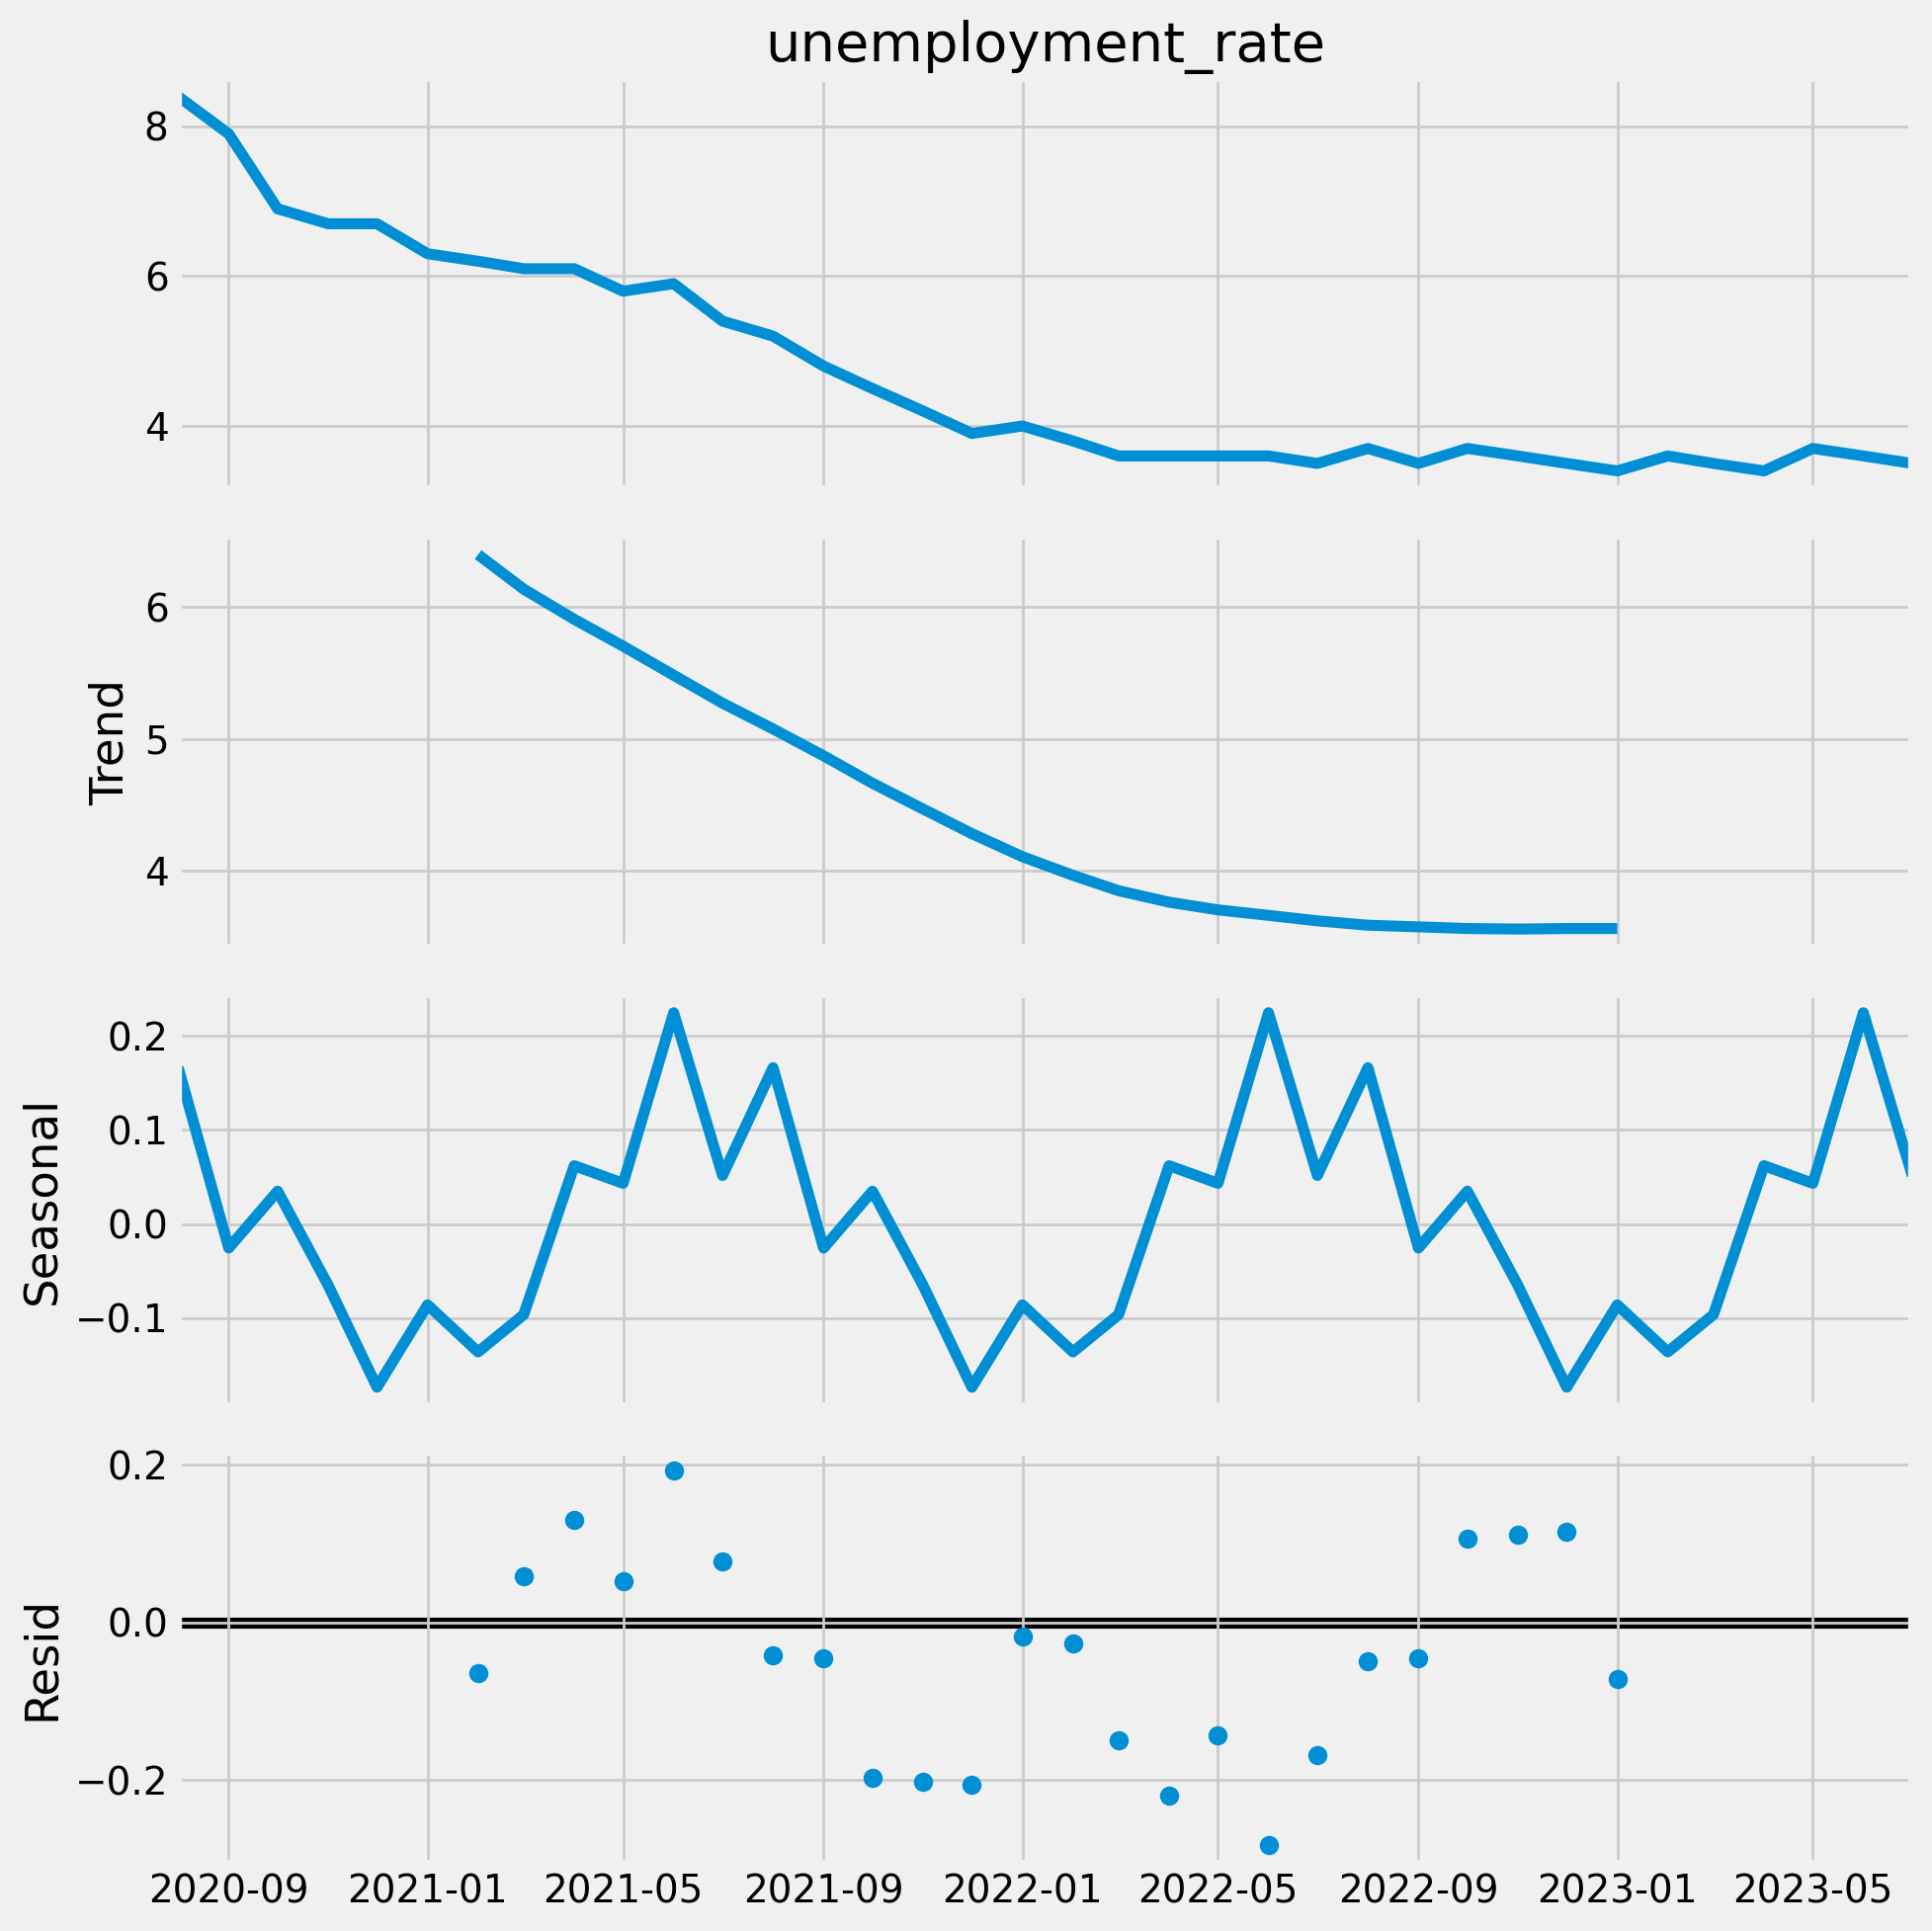

In [31]:
# check how many months' data we have
n = len(urate)

# Use the last 36 months
result_recent = seasonal_decompose(urate.iloc[n-36:n])
fig = result_recent.plot()
fig.set_size_inches(10,10)
plt.tight_layout()
plt.show()

We can check if the seasonality period is appropriate by plotting the residuals:

<Axes: xlabel='date'>

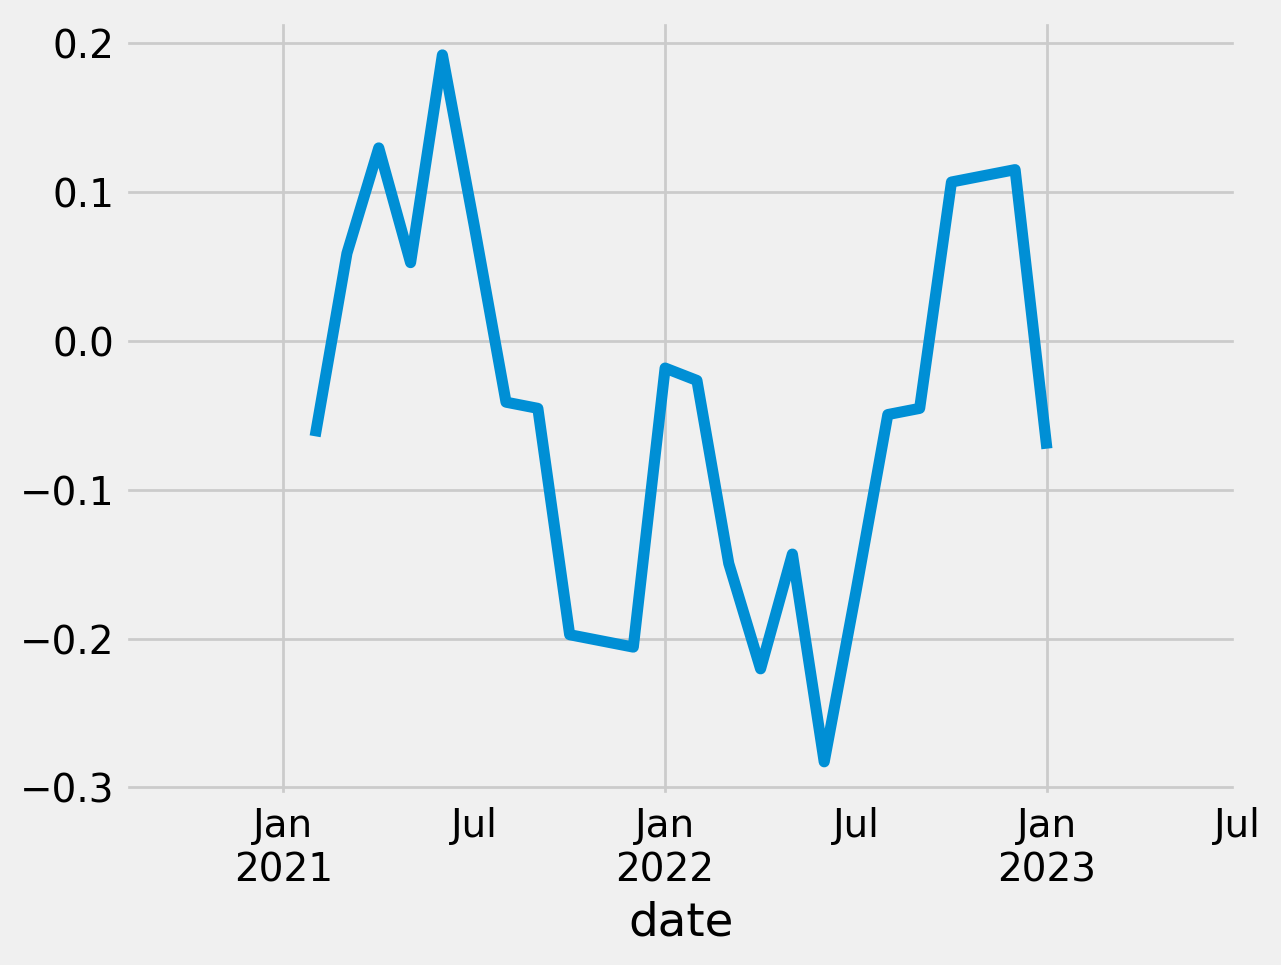

In [32]:
result_recent.resid.plot()

If the residuals still show some seasonality, this might indicate that the seasonality cycle of 12 months may not be suitable and we can adjust the period.

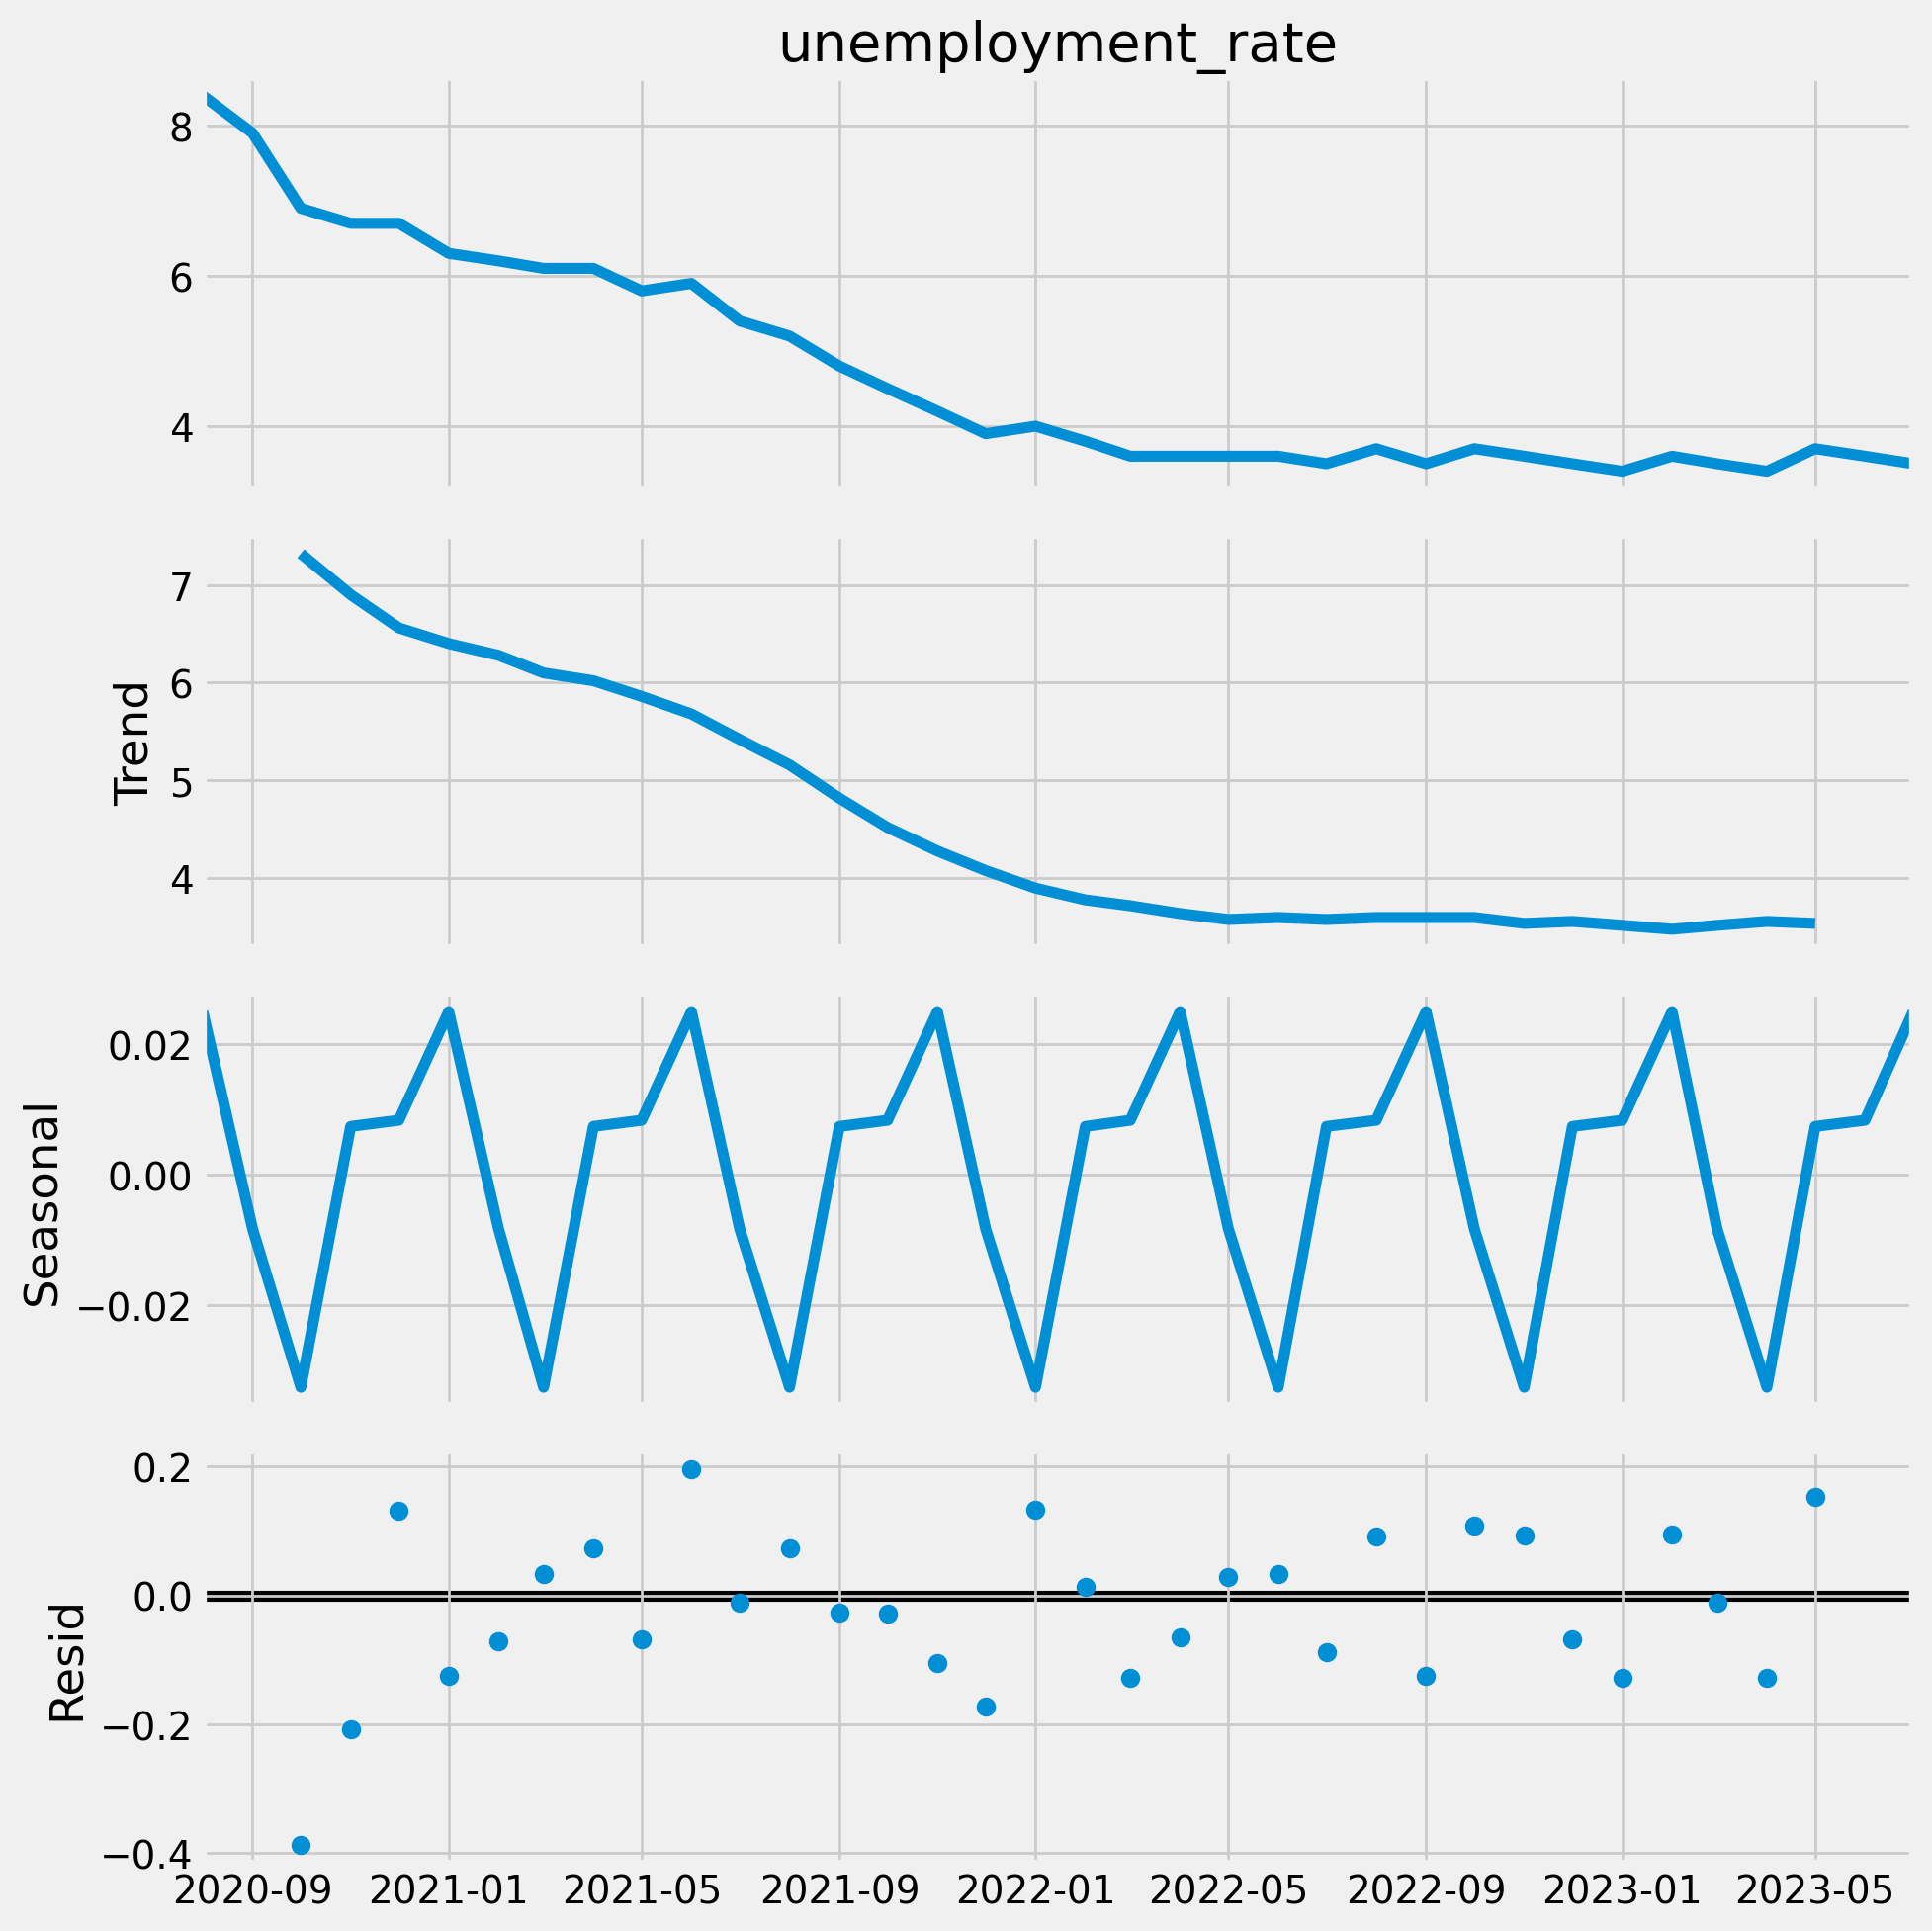

In [33]:
result_recent = seasonal_decompose(urate.iloc[n-36:n], period=5)
fig = result_recent.plot()
fig.set_size_inches(10,10)
plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

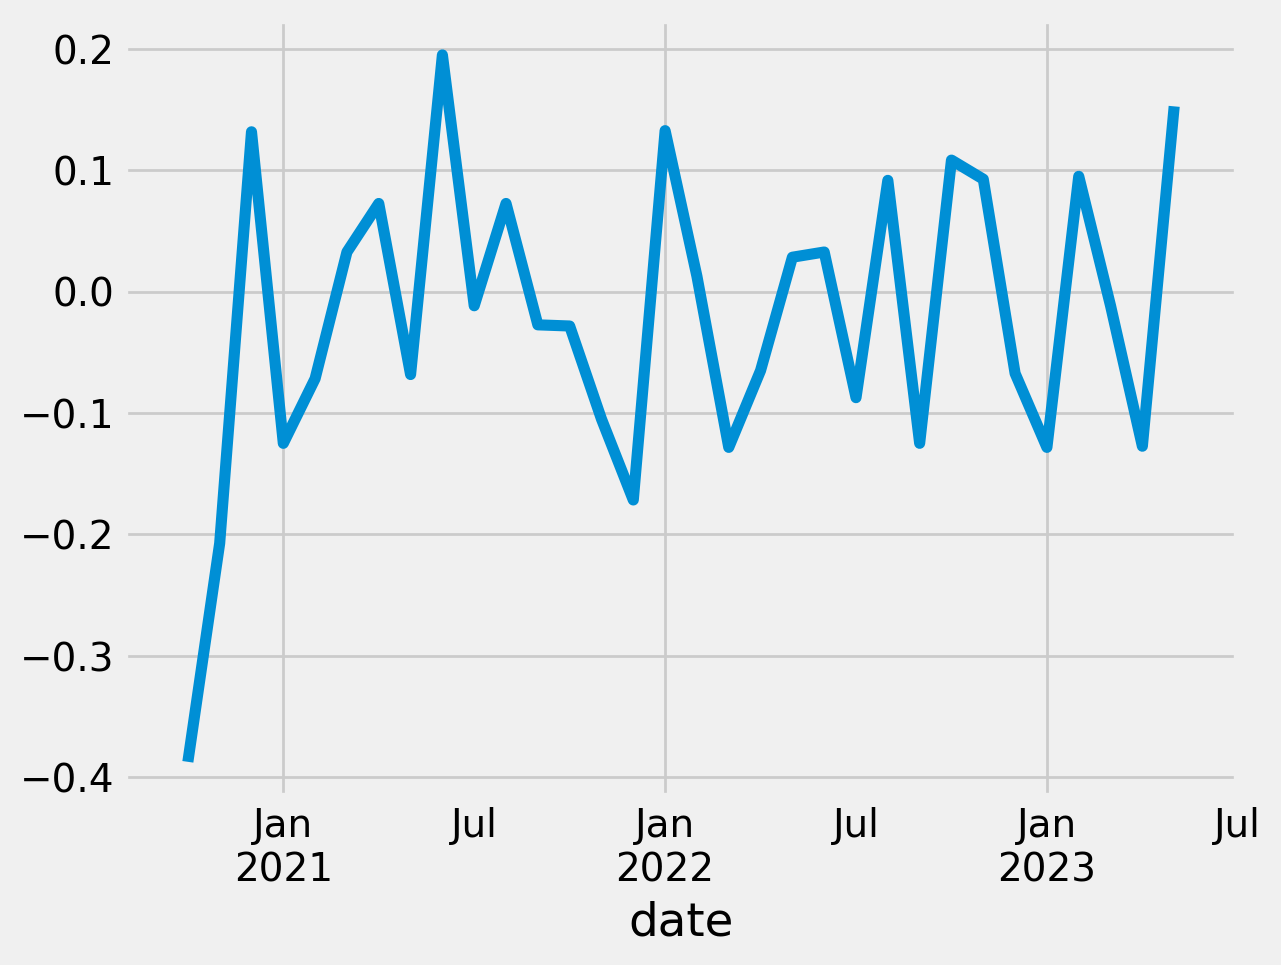

In [35]:
result_recent.resid.plot()

## Differencing a time series and stationarity

If a time series is stationary, the mean, variance, and covariance are unchanged by time shifts. Forecasting methods typically assume that the time series you are forecasting on are stationary, or at least approximately stationary. For any two instances in time t and s one has:

$${\rm E}(Y_t) = \mu$$
$${\rm Var}(Y_t) =  \sigma^2$$
$${\rm Cov}(Y_t, Y_s) =  \gamma(|t - s|)$$

The last relation implies that the covariance between two time points depends only on the time difference between them, the so-called lag, i.e. taking t=10, s=20 or t=15, s=25 would give the same covariance.

If a time series is not stationary, often it can be transformed to a stationary form. The most common way to make a time series stationary is to perform "differencing". This procedure converts a time series into the difference between consecutive values:
 
$$\Delta Y_t = Y_t - Y_{t-1}$$

This removes polynomial trends in the time series. In the case of a linear trend, there will only be a need for a single differencing, but otherwise taking further differences might be required to remove trends. If the trend is not of polynomial type, it might be convenient to transform the data first (e.g. by taking the log, square root, etc.).

Here, we will limit to inspection by eye to judge if a time series is stationary to a sufficient degree. There are also statistical tests available to check for stationarity, e.g.

- [(Augmented) Dickey-Fuller test]( https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)
 - [statsmodels implementation](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- [Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test](https://en.wikipedia.org/wiki/KPSS_test)
 - [statsmodels implementation](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html)

### Difference the unemployment rate and plot

In [36]:
data['unemp_diff'] = data['unemployment_rate'].diff()

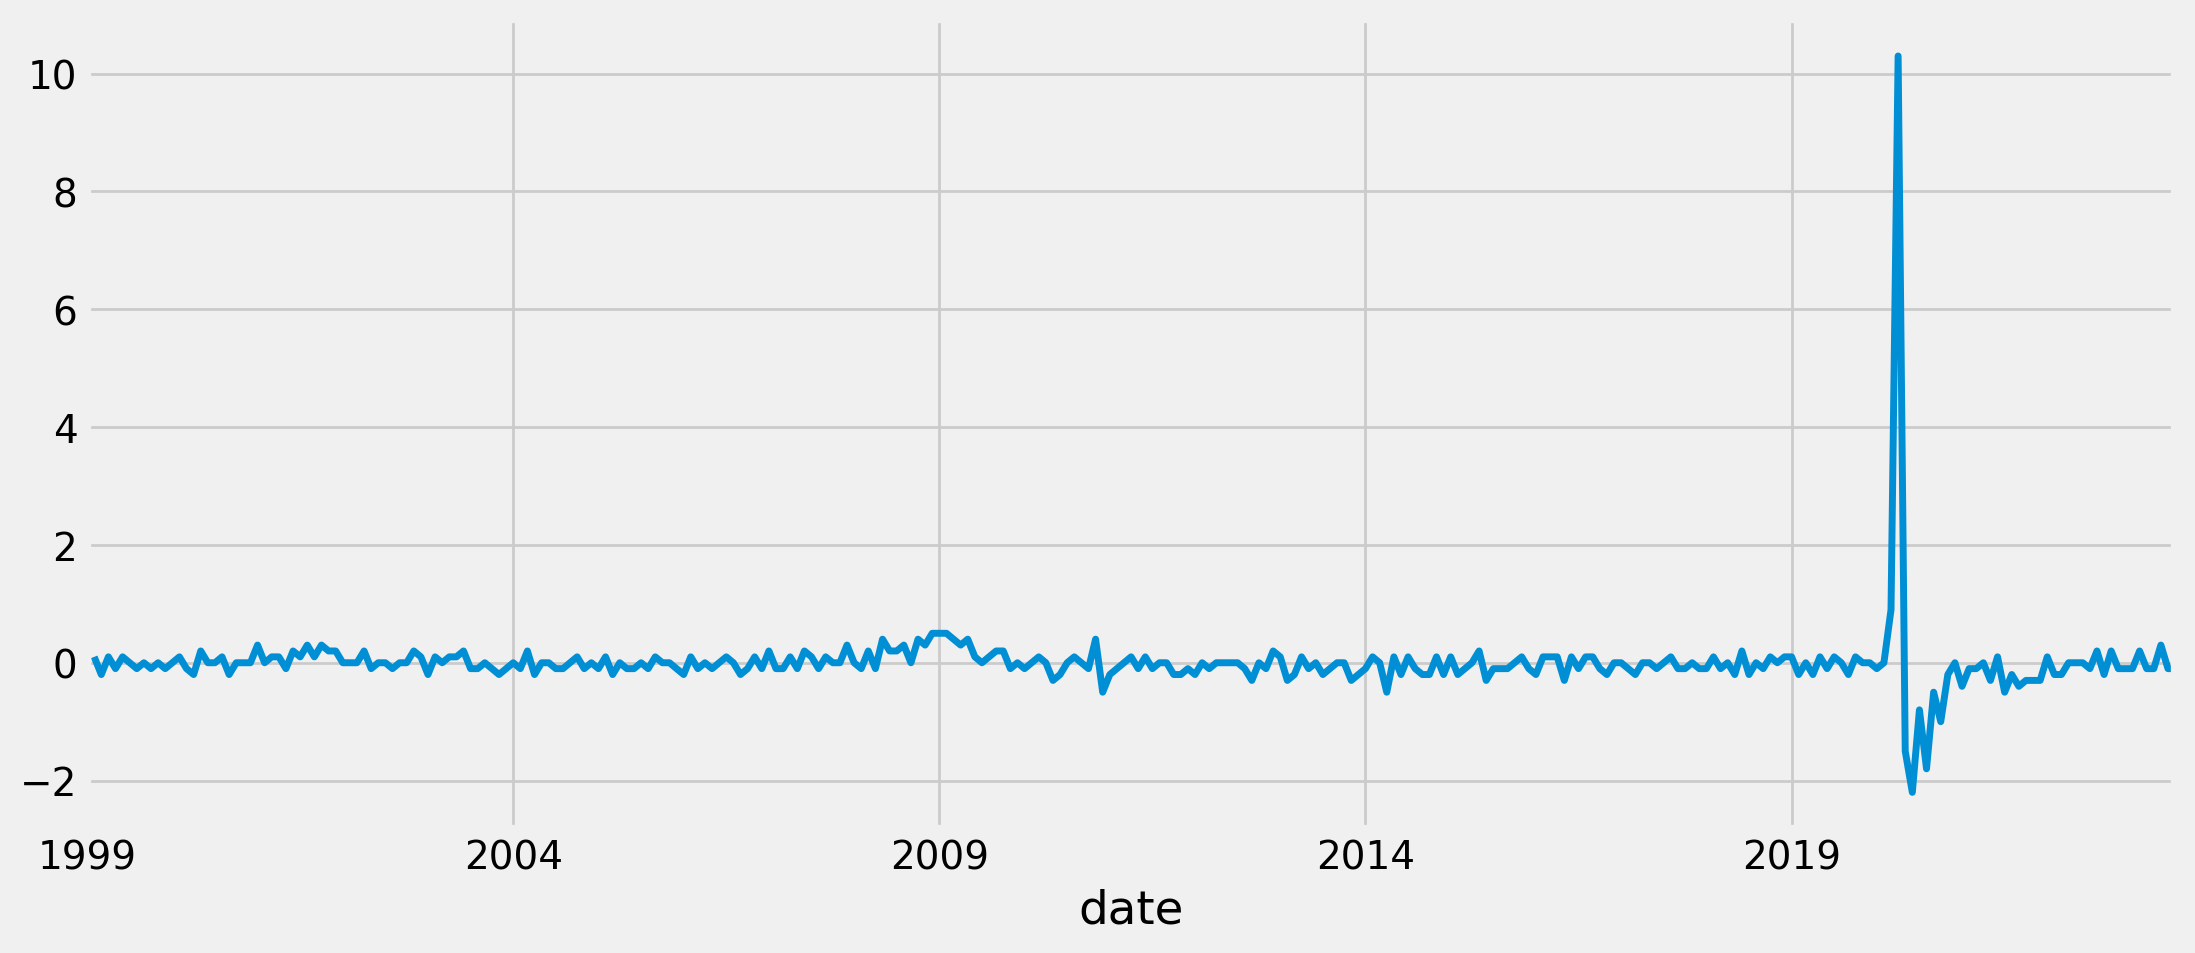

In [37]:
data['unemp_diff'].plot(lw=2.5, figsize=(12,5));

### Compare the (partial) autocorrelations of the differenced and original time series

> Note: Remove missing values from the differenced time series.

How is it if you even difference twice?

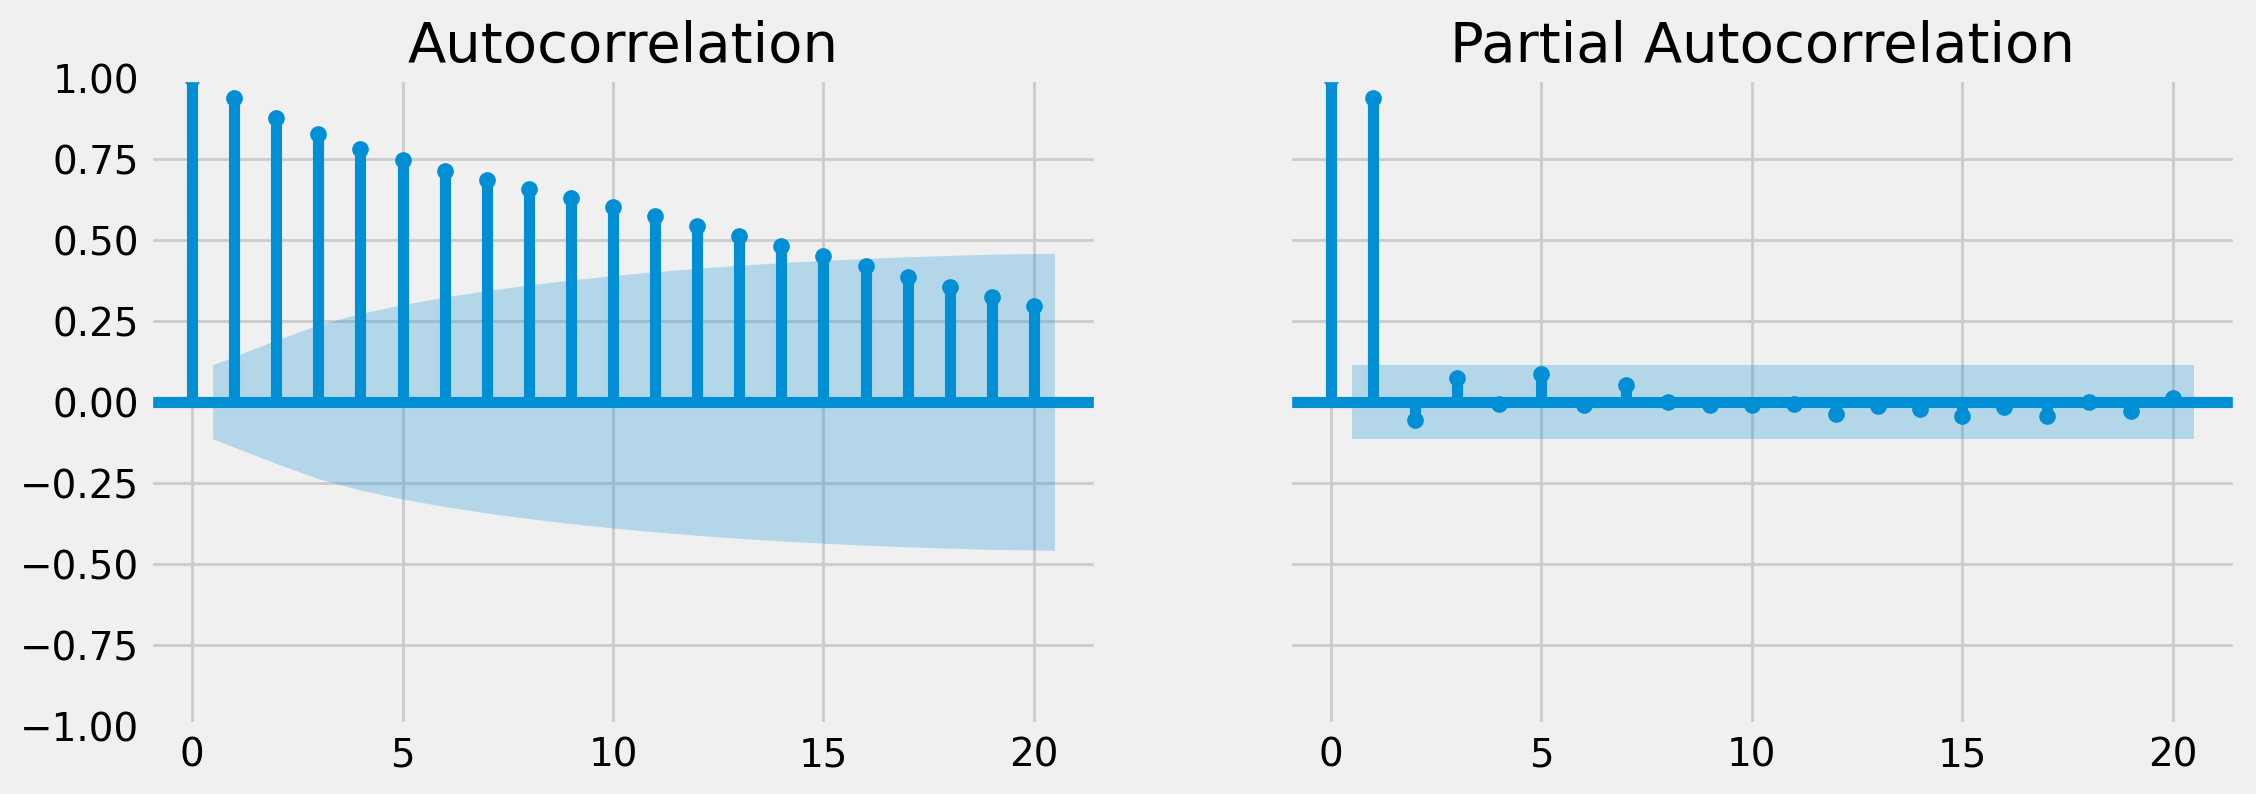

In [38]:
fig, ax = autocorr_plots(urate,lags=20)

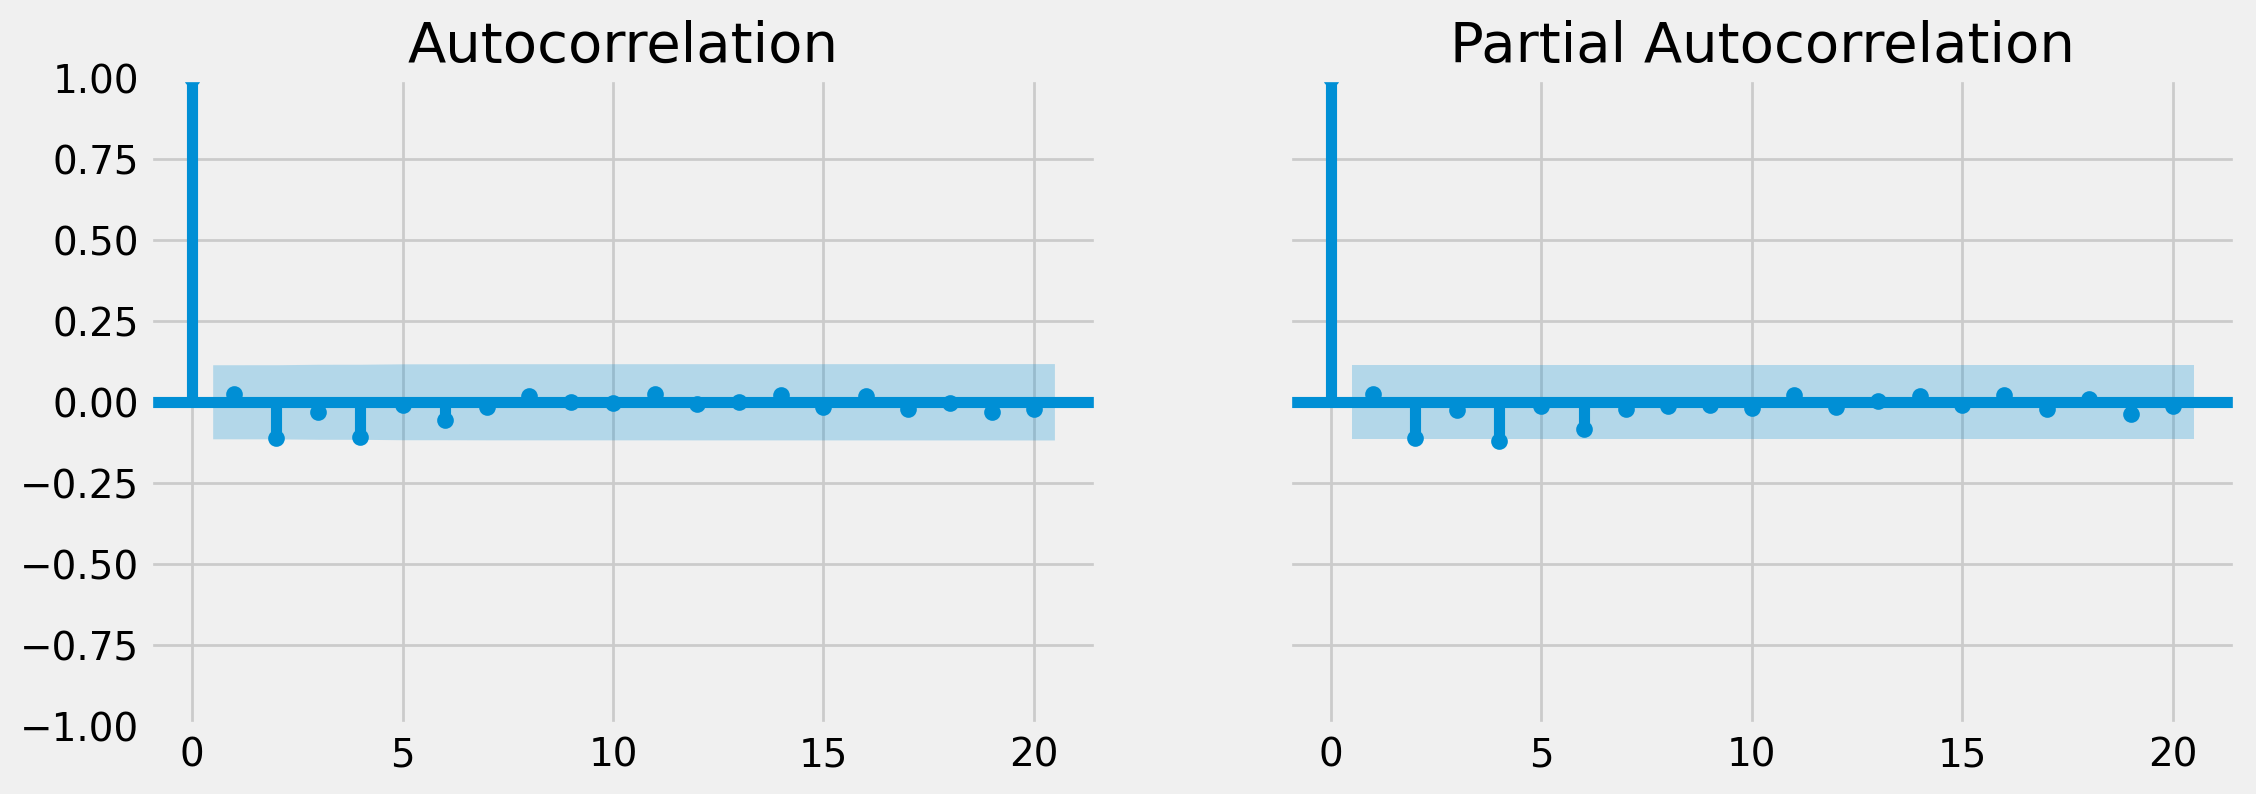

In [39]:
# Start from 1 to not include the NaN
fig, ax = autocorr_plots(urate.diff()[1:],lags=20)

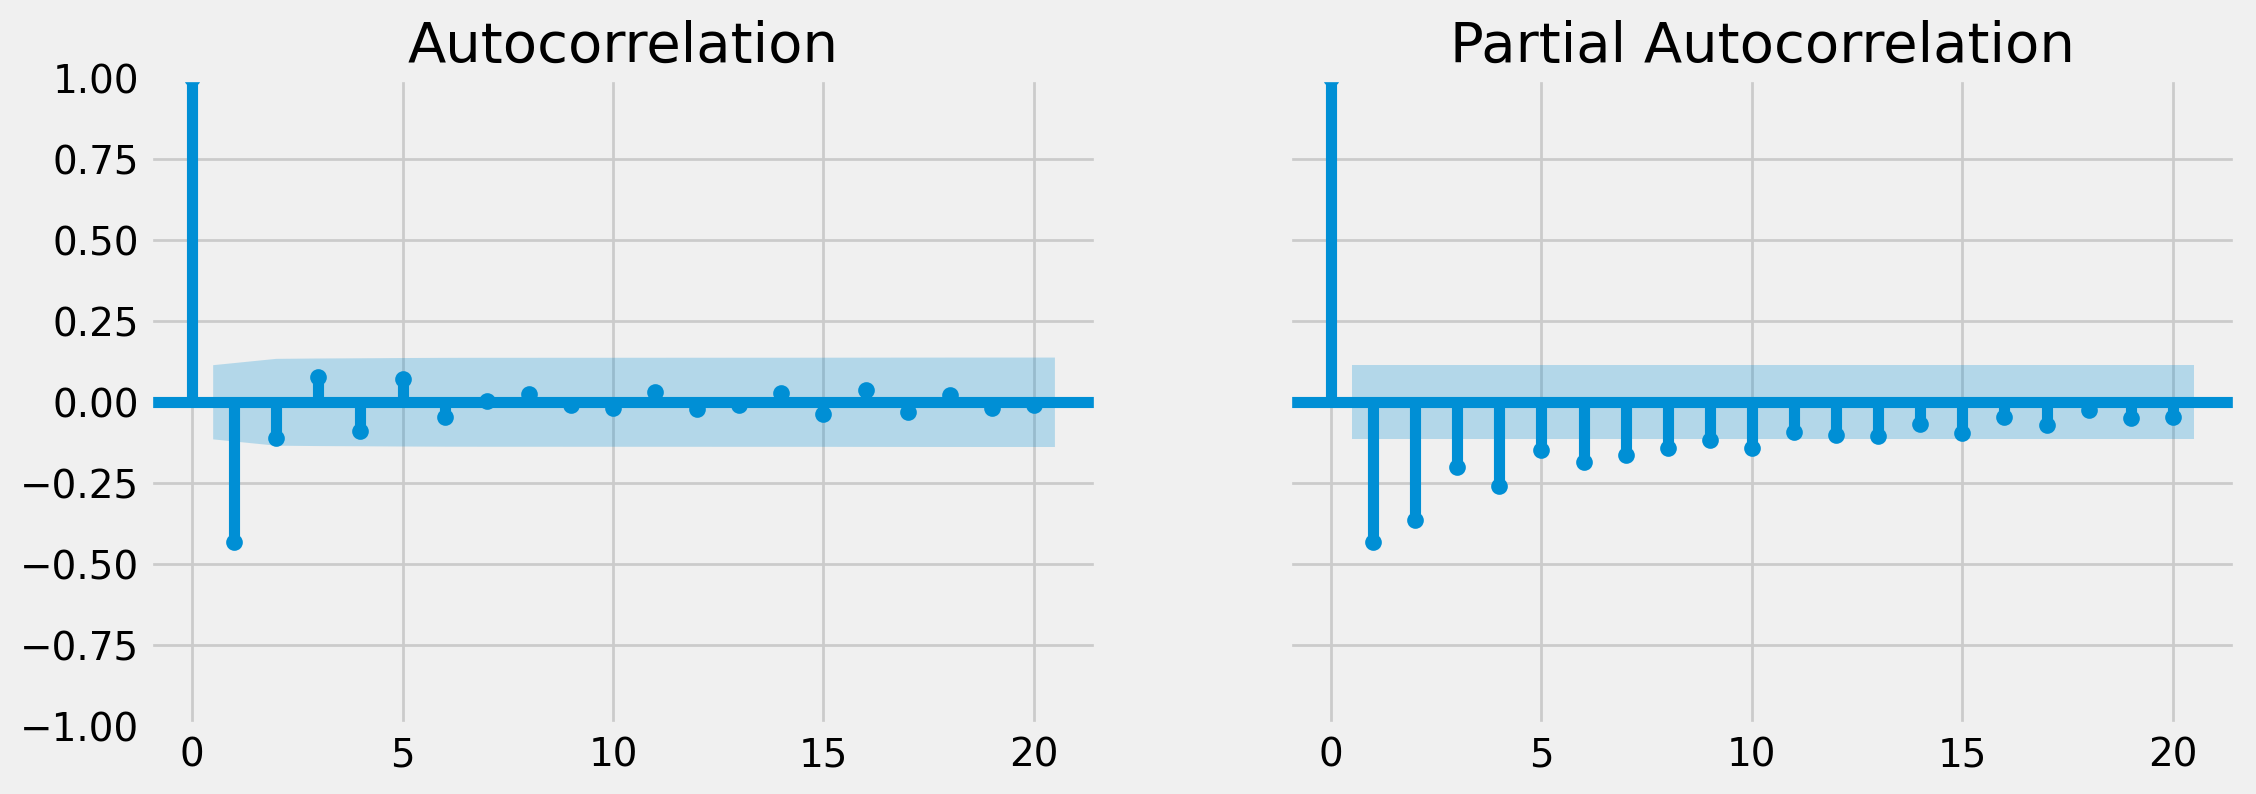

In [40]:
fig, ax = autocorr_plots(urate.diff().diff()[2:],lags=20)

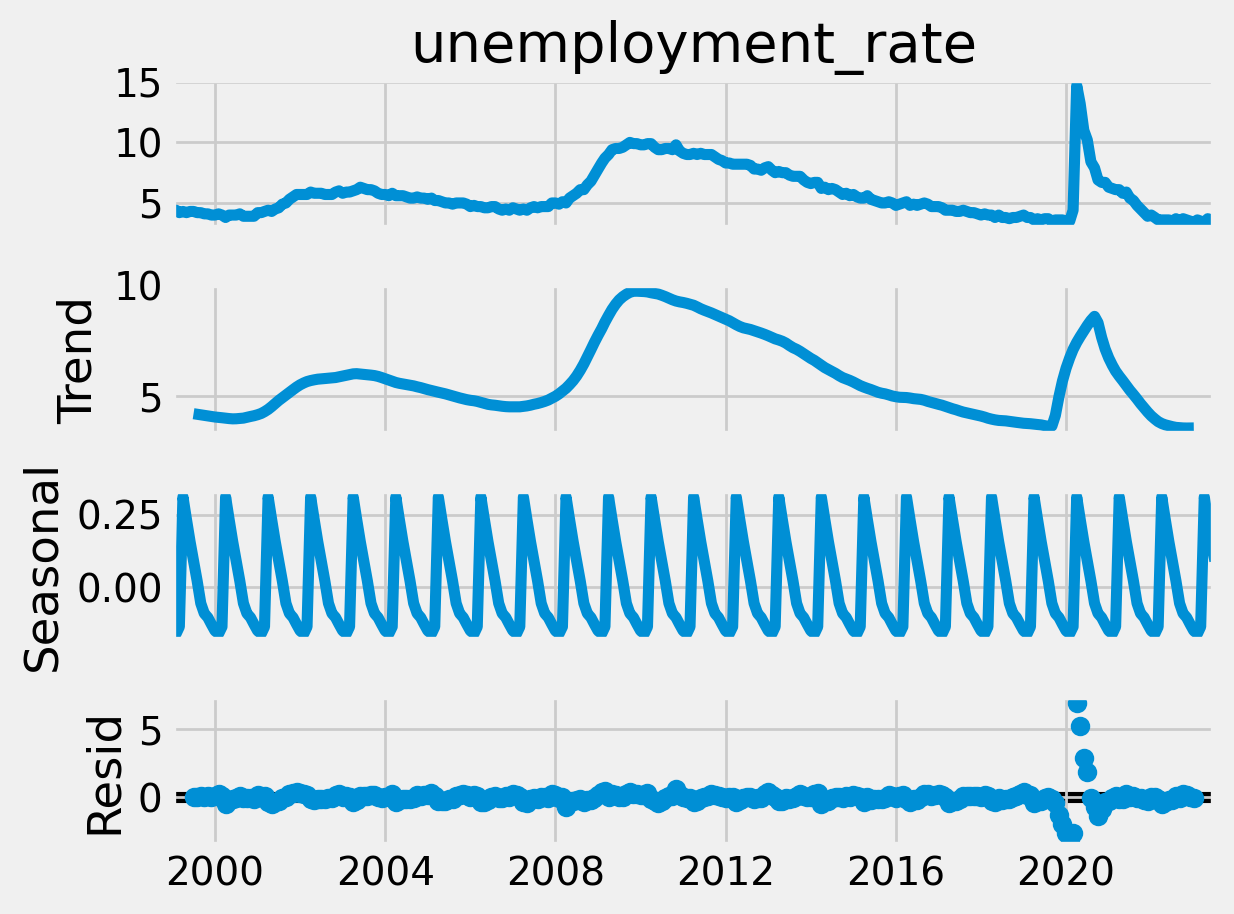

In [41]:
decomp = seasonal_decompose(urate)
decomp.plot();

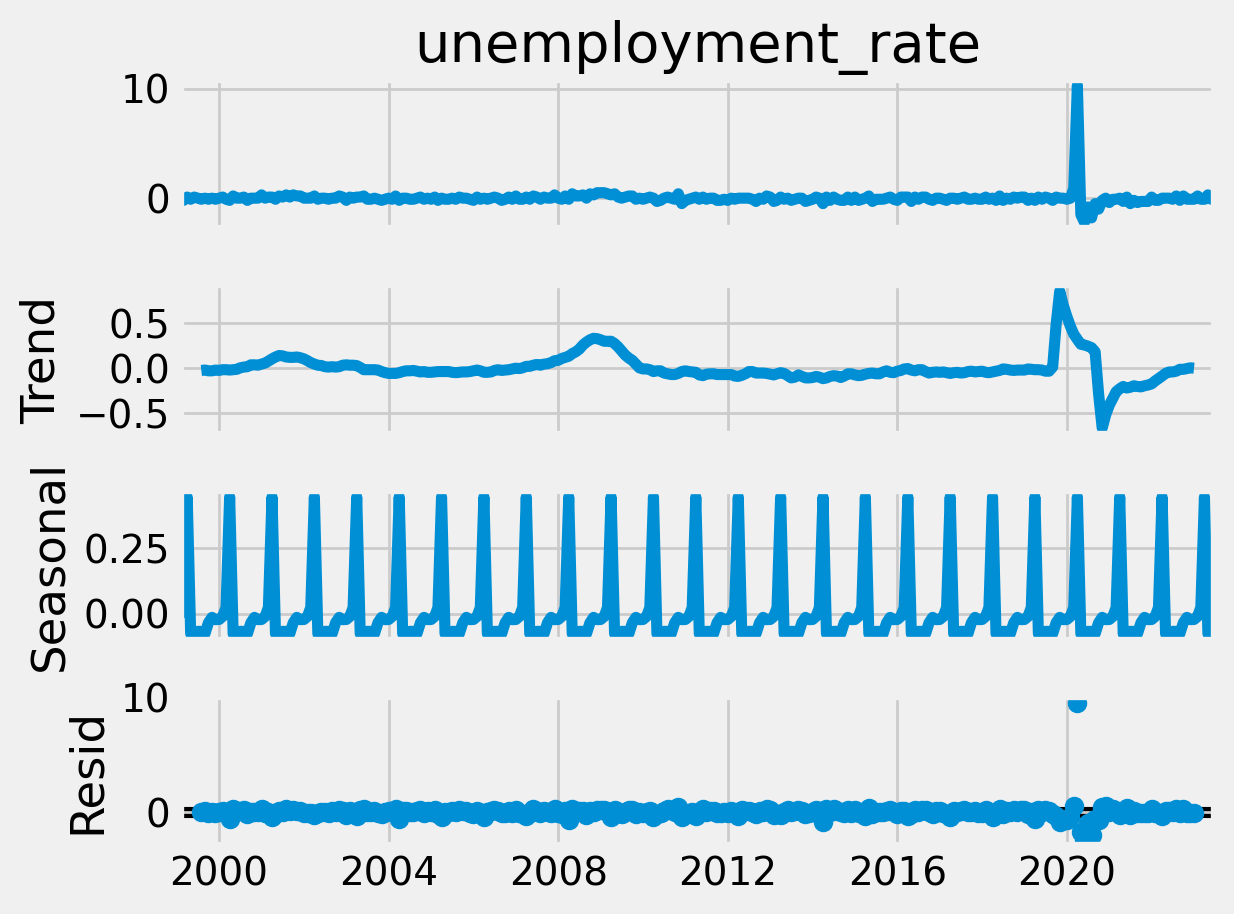

In [42]:
decomp = seasonal_decompose(urate.diff()[1:])
decomp.plot();

Are there any trends shown in the differenced series?

### Conclusions

Time series decomposition and analysis of autocorrelations will be the starting point of any time series analysis. They will give us useful information about which model to use.